          date datatype            station attributes  value  moving_avg
0   2000-01-01     TMAX  GHCND:USW00094846   ,,0,2400    8.9         NaN
1   2000-01-02     TMAX  GHCND:USW00094846   ,,0,2400   15.6         NaN
2   2000-01-03     TMAX  GHCND:USW00094846   ,,0,2400    3.3        5.02
3   2000-01-04     TMAX  GHCND:USW00094846   ,,0,2400    0.6        4.24
4   2000-01-05     TMAX  GHCND:USW00094846   ,,0,2400   -3.3        0.78
..         ...      ...                ...        ...    ...         ...
360 2000-12-26     TMAX  GHCND:USW00094846   ,,0,2400   -7.2       -8.44
361 2000-12-27     TMAX  GHCND:USW00094846   ,,0,2400   -8.3       -6.76
362 2000-12-28     TMAX  GHCND:USW00094846   ,,0,2400   -6.7       -5.22
363 2000-12-29     TMAX  GHCND:USW00094846   ,,0,2400   -3.3         NaN
364 2000-12-30     TMAX  GHCND:USW00094846   ,,0,2400   -0.6         NaN

[365 rows x 6 columns]


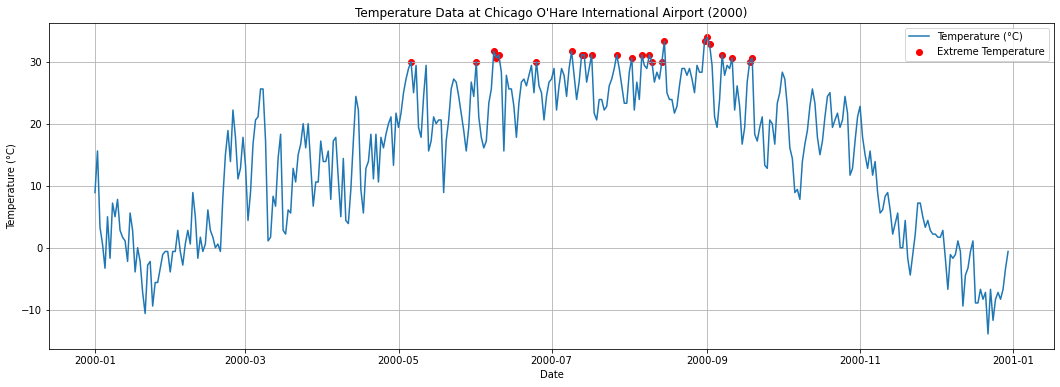

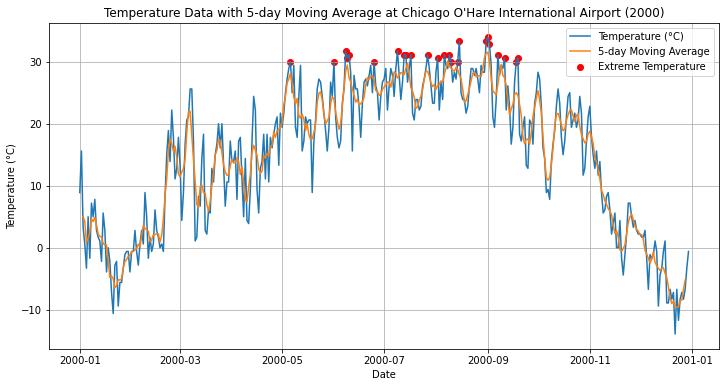

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2000
weather_data = fetch_weather_data(api_token, station_id, 2000)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 30  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["value"] >= threshold]

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(18, 6))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2000)")
plt.legend()
plt.grid(True)
plt.show()

# Plot the 5-day moving average temperature
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data with 5-day Moving Average at Chicago O'Hare International Airport (2000)")
plt.legend()
plt.grid(True)
plt.show()


          date datatype            station attributes  value  moving_avg  \
0   2000-01-01     TMAX  GHCND:USW00094846   ,,0,2400    8.9         NaN   
1   2000-01-02     TMAX  GHCND:USW00094846   ,,0,2400   15.6         NaN   
2   2000-01-03     TMAX  GHCND:USW00094846   ,,0,2400    3.3        5.02   
3   2000-01-04     TMAX  GHCND:USW00094846   ,,0,2400    0.6        4.24   
4   2000-01-05     TMAX  GHCND:USW00094846   ,,0,2400   -3.3        0.78   
..         ...      ...                ...        ...    ...         ...   
360 2000-12-26     TMAX  GHCND:USW00094846   ,,0,2400   -7.2       -8.44   
361 2000-12-27     TMAX  GHCND:USW00094846   ,,0,2400   -8.3       -6.76   
362 2000-12-28     TMAX  GHCND:USW00094846   ,,0,2400   -6.7       -5.22   
363 2000-12-29     TMAX  GHCND:USW00094846   ,,0,2400   -3.3         NaN   
364 2000-12-30     TMAX  GHCND:USW00094846   ,,0,2400   -0.6         NaN   

     extreme_weather  
0              False  
1              False  
2              Fal

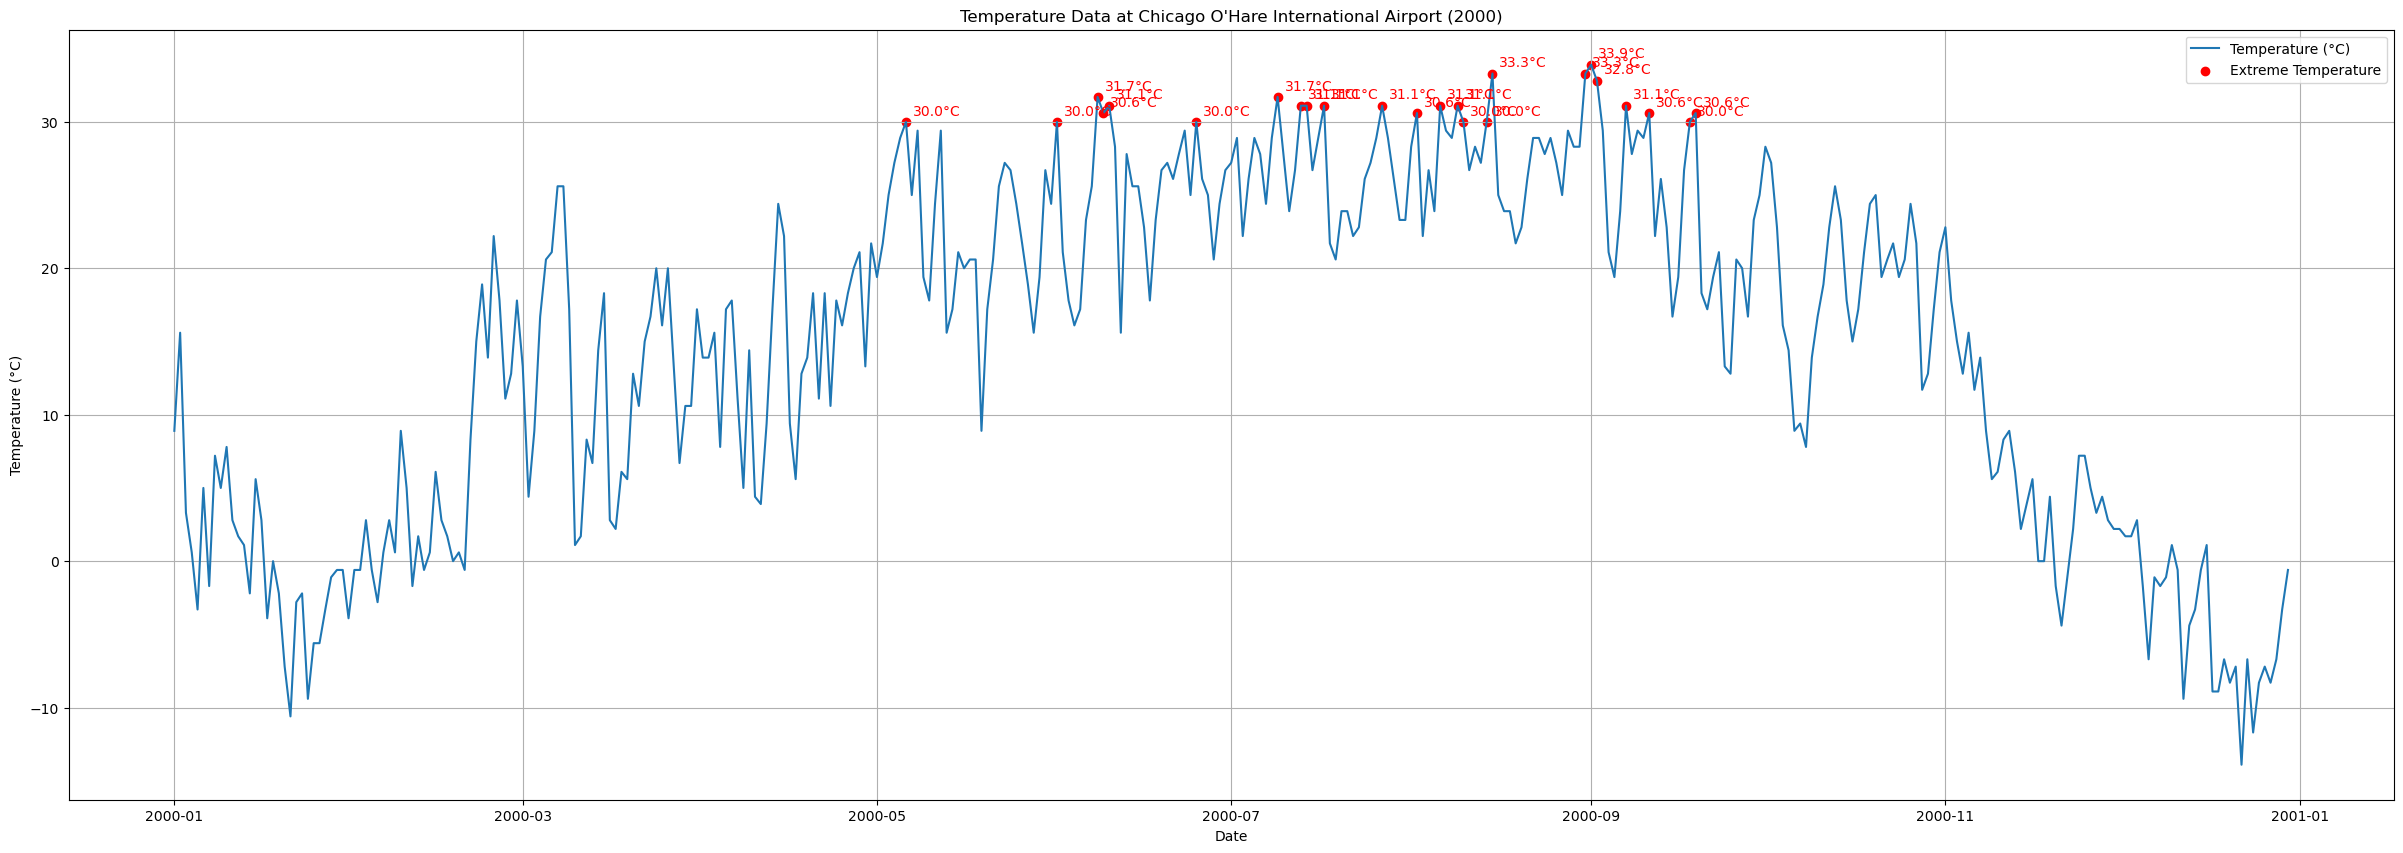

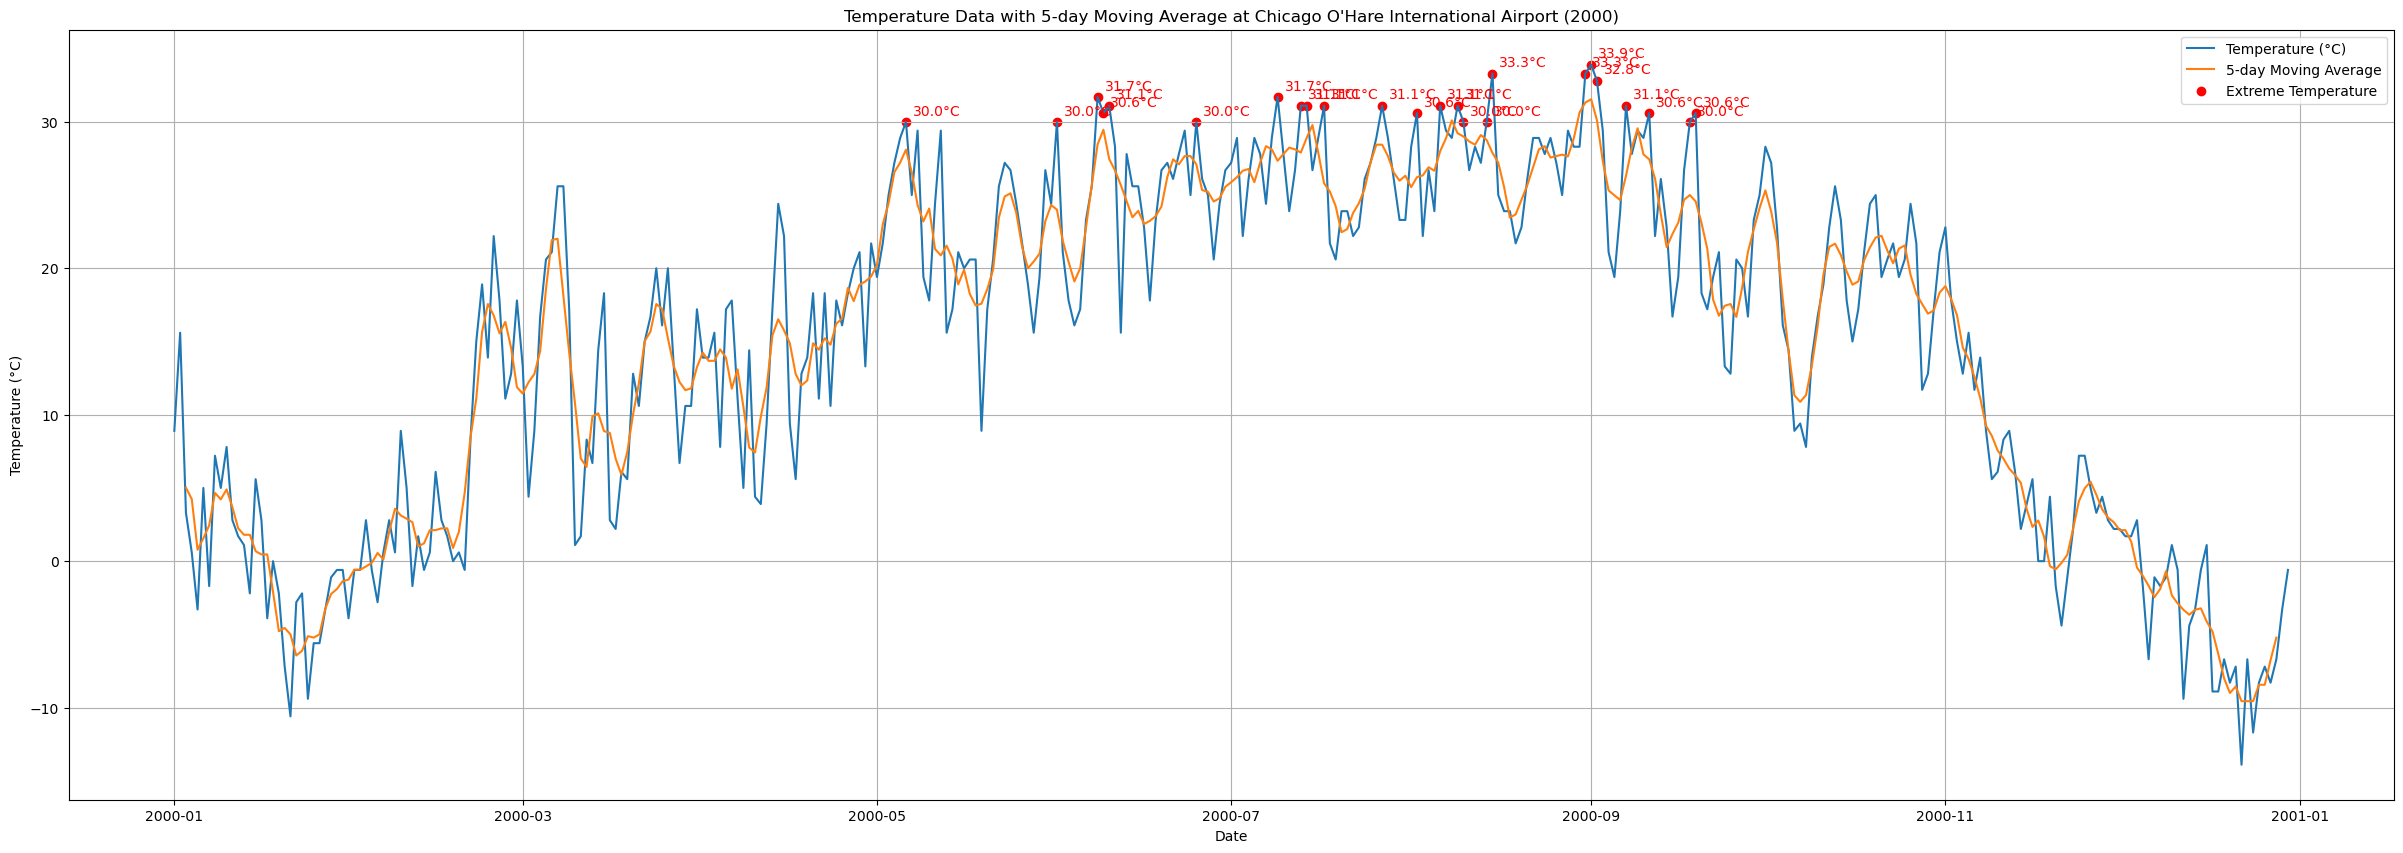

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2000
weather_data = fetch_weather_data(api_token, station_id, 2000)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 30  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["value"] >= threshold]

# Add column to indicate extreme weather conditions in the DataFrame
df["extreme_weather"] = False
df.loc[df["value"] >= threshold, "extreme_weather"] = True

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(30, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2000)")
plt.legend()
plt.grid(True)
#plt.savefig("temperature_plot.png")  # Save the plot as a PNG file
plt.show()

# Plot the 5-day moving average temperature
plt.figure(figsize=(30, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data with 5-day Moving Average at Chicago O'Hare International Airport (2000)")
plt.legend()
plt.grid(True)
#plt.savefig("moving_average_plot.png")  # Save the plot as a PNG file
plt.show()

#df.to_excel("tempdata_2000.xlsx", index=False)



# Year 2000

          date datatype            station attributes  value  moving_avg
0   2000-01-01     TMAX  GHCND:USW00094846   ,,0,2400    8.9         NaN
1   2000-01-02     TMAX  GHCND:USW00094846   ,,0,2400   15.6         NaN
2   2000-01-03     TMAX  GHCND:USW00094846   ,,0,2400    3.3        5.02
3   2000-01-04     TMAX  GHCND:USW00094846   ,,0,2400    0.6        4.24
4   2000-01-05     TMAX  GHCND:USW00094846   ,,0,2400   -3.3        0.78
..         ...      ...                ...        ...    ...         ...
360 2000-12-26     TMAX  GHCND:USW00094846   ,,0,2400   -7.2       -8.44
361 2000-12-27     TMAX  GHCND:USW00094846   ,,0,2400   -8.3       -6.76
362 2000-12-28     TMAX  GHCND:USW00094846   ,,0,2400   -6.7       -5.22
363 2000-12-29     TMAX  GHCND:USW00094846   ,,0,2400   -3.3         NaN
364 2000-12-30     TMAX  GHCND:USW00094846   ,,0,2400   -0.6         NaN

[365 rows x 6 columns]


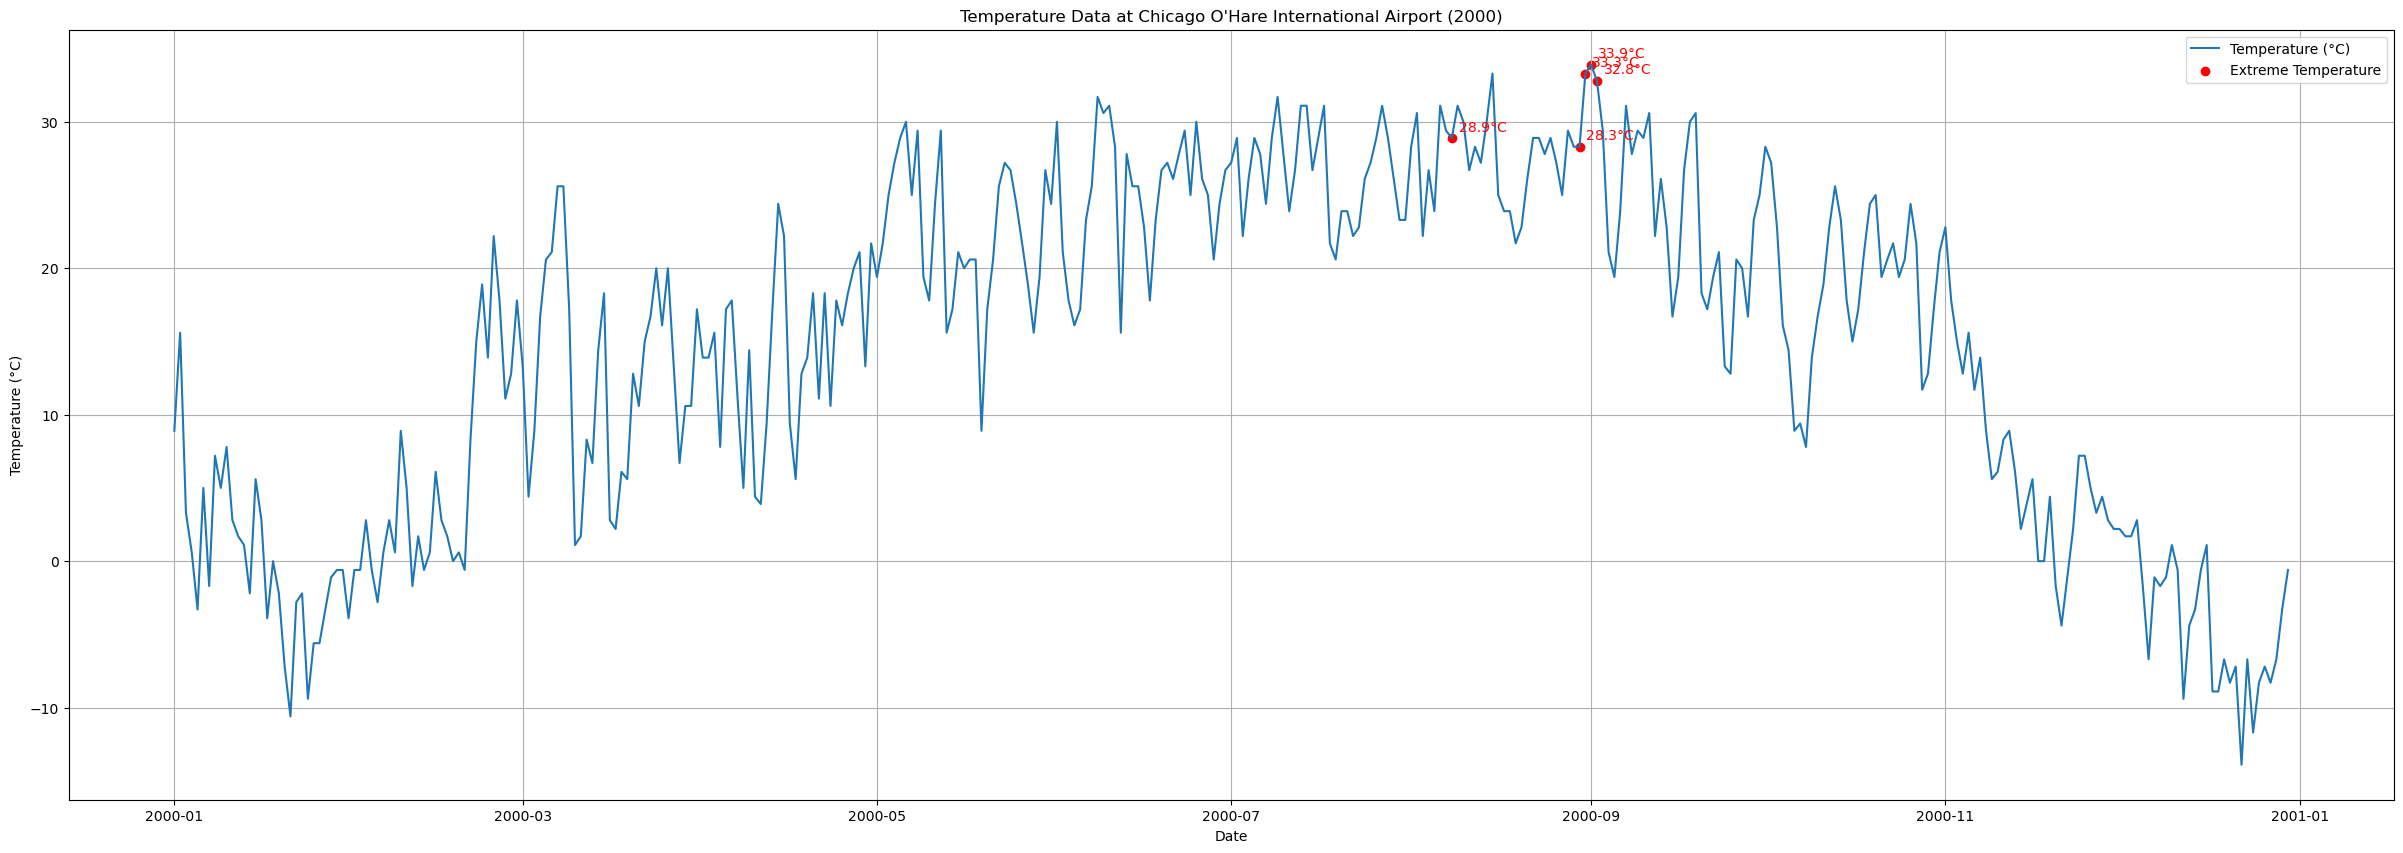

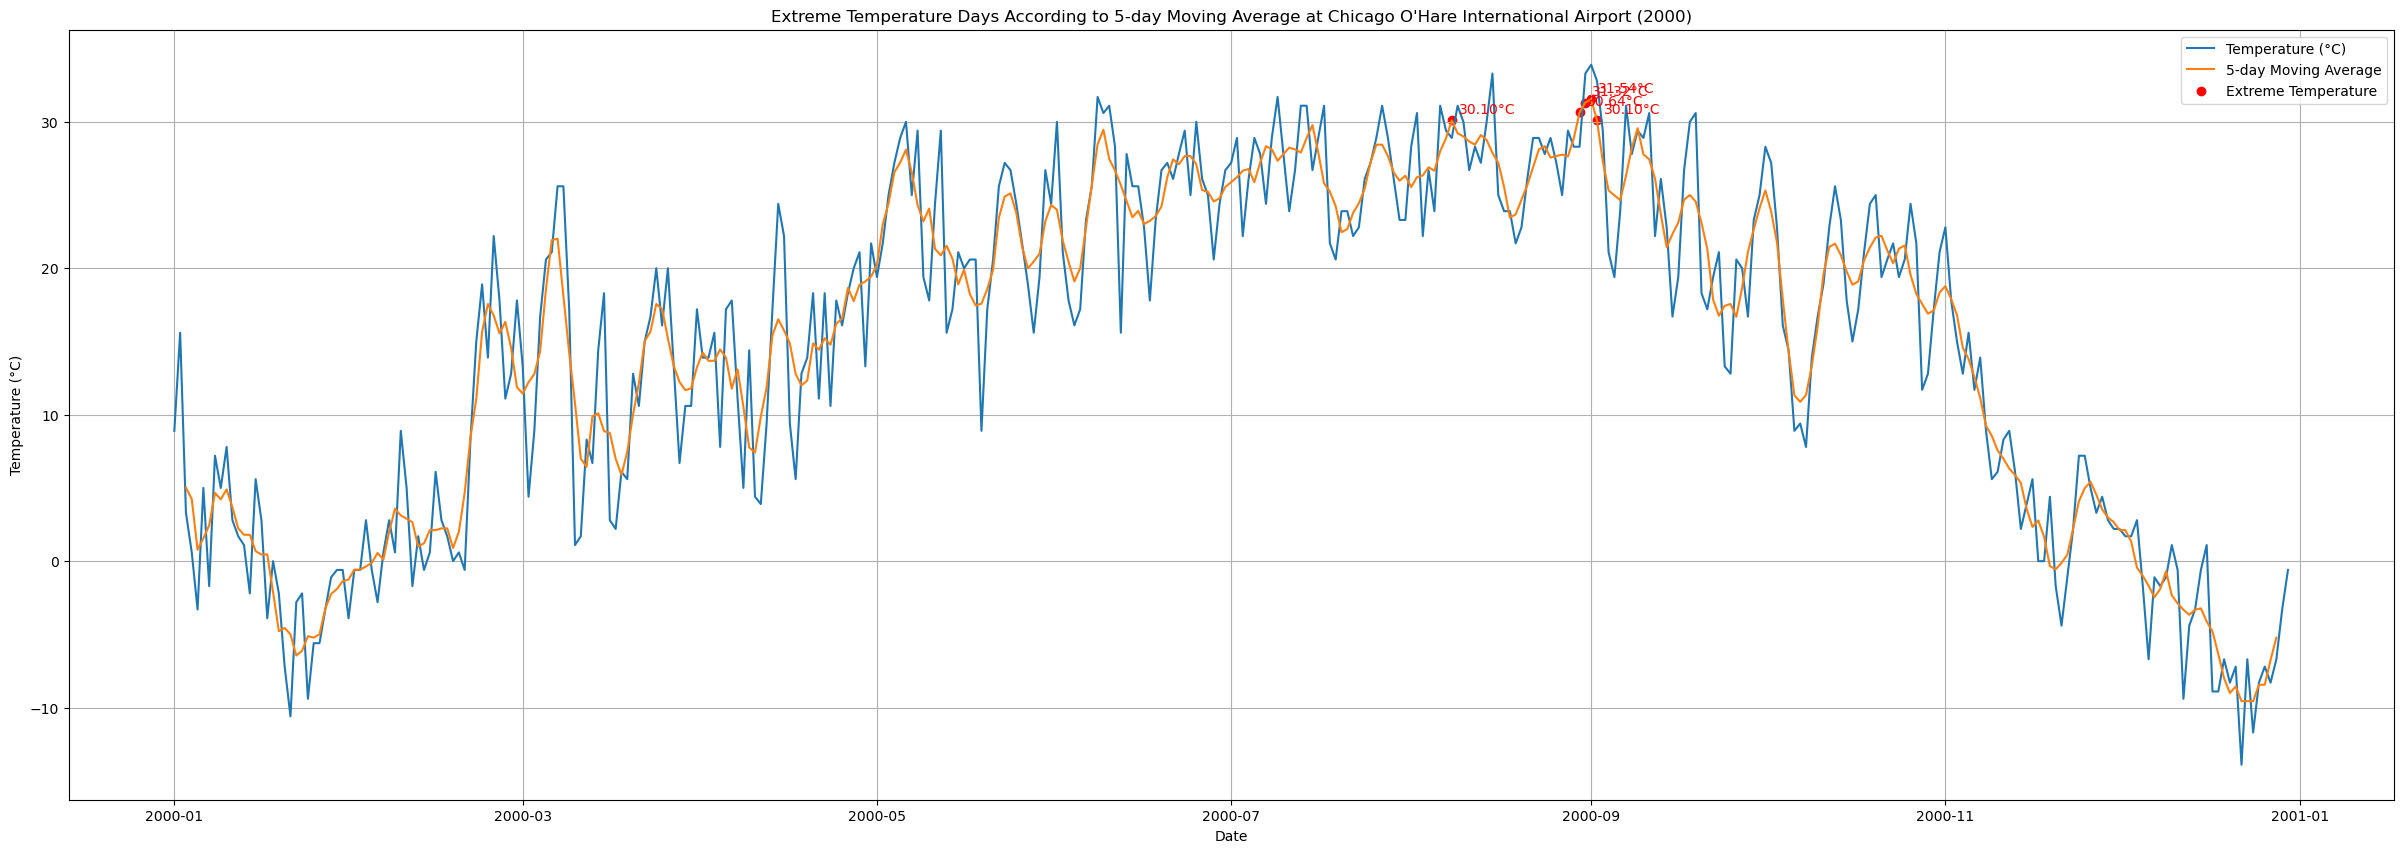

          date  moving_avg
220 2000-08-08       30.10
242 2000-08-30       30.64
243 2000-08-31       31.32
244 2000-09-01       31.54
245 2000-09-02       30.10


In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2000
weather_data = fetch_weather_data(api_token, station_id, 2000)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 30  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["moving_avg"] >= threshold]

# Create DataFrame for extreme temperature days and their dates
extreme_temp_df = pd.DataFrame({
    "date": extreme_temp_days["date"],
    "moving_avg": extreme_temp_days["moving_avg"]
})

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(30, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2000)")
plt.legend()
plt.grid(True)
plt.savefig("temperature_plot_2000.png")  # Save the plot as a PNG file
plt.show()

# Plot the extreme temperature days according to the 5-day moving average
plt.figure(figsize=(30, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_df["date"], extreme_temp_df["moving_avg"], color="red", label="Extreme Temperature")
for date, moving_avg in zip(extreme_temp_df["date"], extreme_temp_df["moving_avg"]):
    plt.annotate(f"{moving_avg:.2f}°C", xy=(date, moving_avg), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Extreme Temperature Days According to 5-day Moving Average at Chicago O'Hare International Airport (2000)")
plt.legend()
plt.grid(True)
plt.savefig("moving_average_plot_2000.png")  # Save the plot as a PNG file
plt.show()

# Display the extreme temperature days and their dates in the DataFrame
print(extreme_temp_df)
extreme_temp_df.to_excel("MA_2000_30C.xlsx", index=False)


# Year 2005

          date datatype            station attributes  value  moving_avg
0   2022-01-01     TMAX  GHCND:USW00094846   ,,W,2400    3.3         NaN
1   2022-01-02     TMAX  GHCND:USW00094846   ,,W,2400   -2.1         NaN
2   2022-01-03     TMAX  GHCND:USW00094846   ,,W,2400   -5.5       -0.30
3   2022-01-04     TMAX  GHCND:USW00094846   ,,W,2400    1.7       -2.82
4   2022-01-05     TMAX  GHCND:USW00094846   ,,W,2400    1.1       -4.26
..         ...      ...                ...        ...    ...         ...
360 2022-12-27     TMAX  GHCND:USW00094846   ,,W,2400   -3.8        0.60
361 2022-12-28     TMAX  GHCND:USW00094846   ,,W,2400    7.2        5.36
362 2022-12-29     TMAX  GHCND:USW00094846   ,,W,2400   15.0        7.24
363 2022-12-30     TMAX  GHCND:USW00094846   ,,W,2400   13.9         NaN
364 2022-12-31     TMAX  GHCND:USW00094846   ,,W,2400    3.9         NaN

[365 rows x 6 columns]


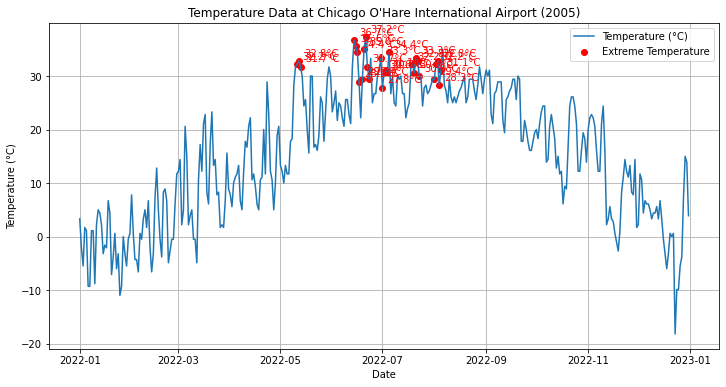

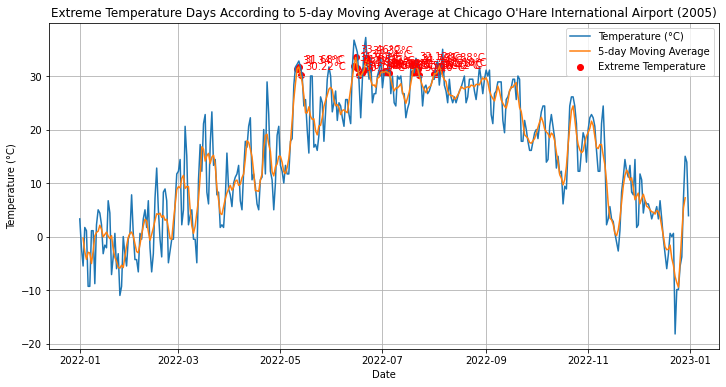

          date  moving_avg
130 2022-05-11       31.34
131 2022-05-12       31.68
132 2022-05-13       30.22
164 2022-06-14       31.90
165 2022-06-15       33.46
166 2022-06-16       31.56
167 2022-06-17       30.10
169 2022-06-19       30.54
170 2022-06-20       31.10
171 2022-06-21       32.54
172 2022-06-22       33.32
173 2022-06-23       31.32
180 2022-06-30       30.56
181 2022-07-01       30.78
182 2022-07-02       30.68
183 2022-07-03       30.90
184 2022-07-04       30.68
185 2022-07-05       30.56
199 2022-07-19       30.56
200 2022-07-20       32.12
201 2022-07-21       31.78
202 2022-07-22       31.34
203 2022-07-23       30.10
212 2022-08-01       30.42
213 2022-08-02       30.42
214 2022-08-03       30.76
215 2022-08-04       31.88
216 2022-08-05       31.10


In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2000
weather_data = fetch_weather_data(api_token, station_id, 2022)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 30  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["moving_avg"] >= threshold]

# Create DataFrame for extreme temperature days and their dates
extreme_temp_df = pd.DataFrame({
    "date": extreme_temp_days["date"],
    "moving_avg": extreme_temp_days["moving_avg"]
})

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2005)")
plt.legend()
plt.grid(True)
#plt.savefig("temperature_plot_2005.png")  # Save the plot as a PNG file
plt.show()

# Plot the extreme temperature days according to the 5-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_df["date"], extreme_temp_df["moving_avg"], color="red", label="Extreme Temperature")
for date, moving_avg in zip(extreme_temp_df["date"], extreme_temp_df["moving_avg"]):
    plt.annotate(f"{moving_avg:.2f}°C", xy=(date, moving_avg), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Extreme Temperature Days According to 5-day Moving Average at Chicago O'Hare International Airport (2005)")
plt.legend()
plt.grid(True)
#plt.savefig("moving_average_plot_2005.png")  # Save the plot as a PNG file
plt.show()

# Display the extreme temperature days and their dates in the DataFrame
print(extreme_temp_df)
#extreme_temp_df.to_excel("MA_2005_32C.xlsx", index=False)


# Year 2010

          date datatype            station attributes  value  moving_avg
0   2010-01-01     TMAX  GHCND:USW00094846   ,,0,2400   -8.9         NaN
1   2010-01-02     TMAX  GHCND:USW00094846   ,,0,2400  -11.7         NaN
2   2010-01-03     TMAX  GHCND:USW00094846   ,,0,2400   -7.8       -8.24
3   2010-01-04     TMAX  GHCND:USW00094846   ,,0,2400   -7.8       -7.80
4   2010-01-05     TMAX  GHCND:USW00094846   ,,0,2400   -5.0       -6.58
..         ...      ...                ...        ...    ...         ...
360 2010-12-27     TMAX  GHCND:USW00094846   ,,0,2400   -5.6       -1.24
361 2010-12-28     TMAX  GHCND:USW00094846   ,,0,2400   -2.8        0.44
362 2010-12-29     TMAX  GHCND:USW00094846   ,,0,2400    2.2        2.66
363 2010-12-30     TMAX  GHCND:USW00094846   ,,0,2400    7.8         NaN
364 2010-12-31     TMAX  GHCND:USW00094846   ,,0,2400   11.7         NaN

[365 rows x 6 columns]


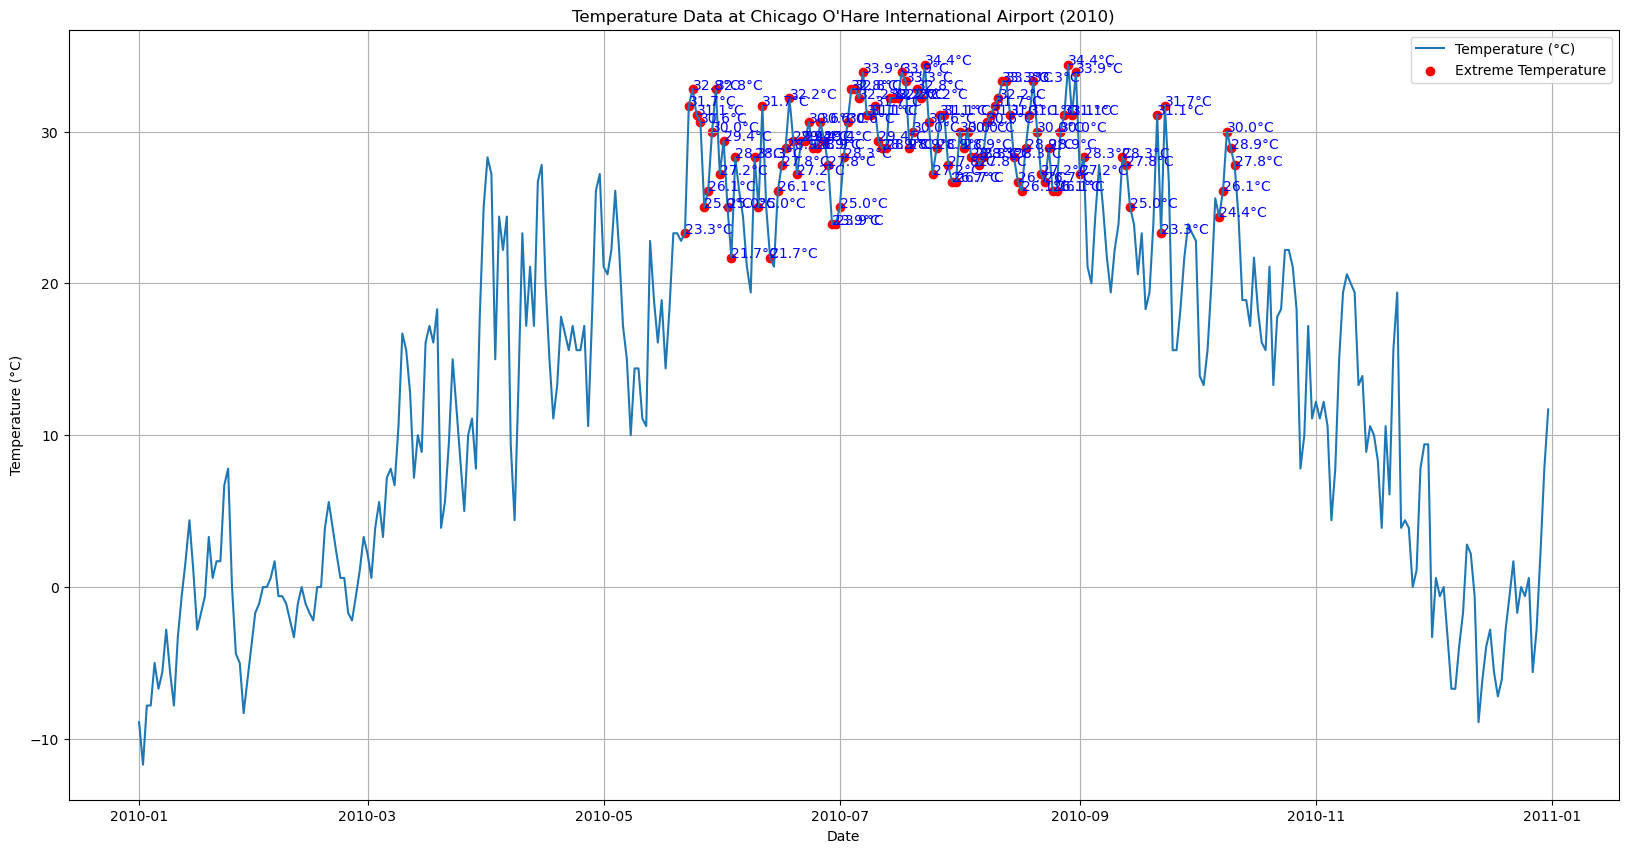

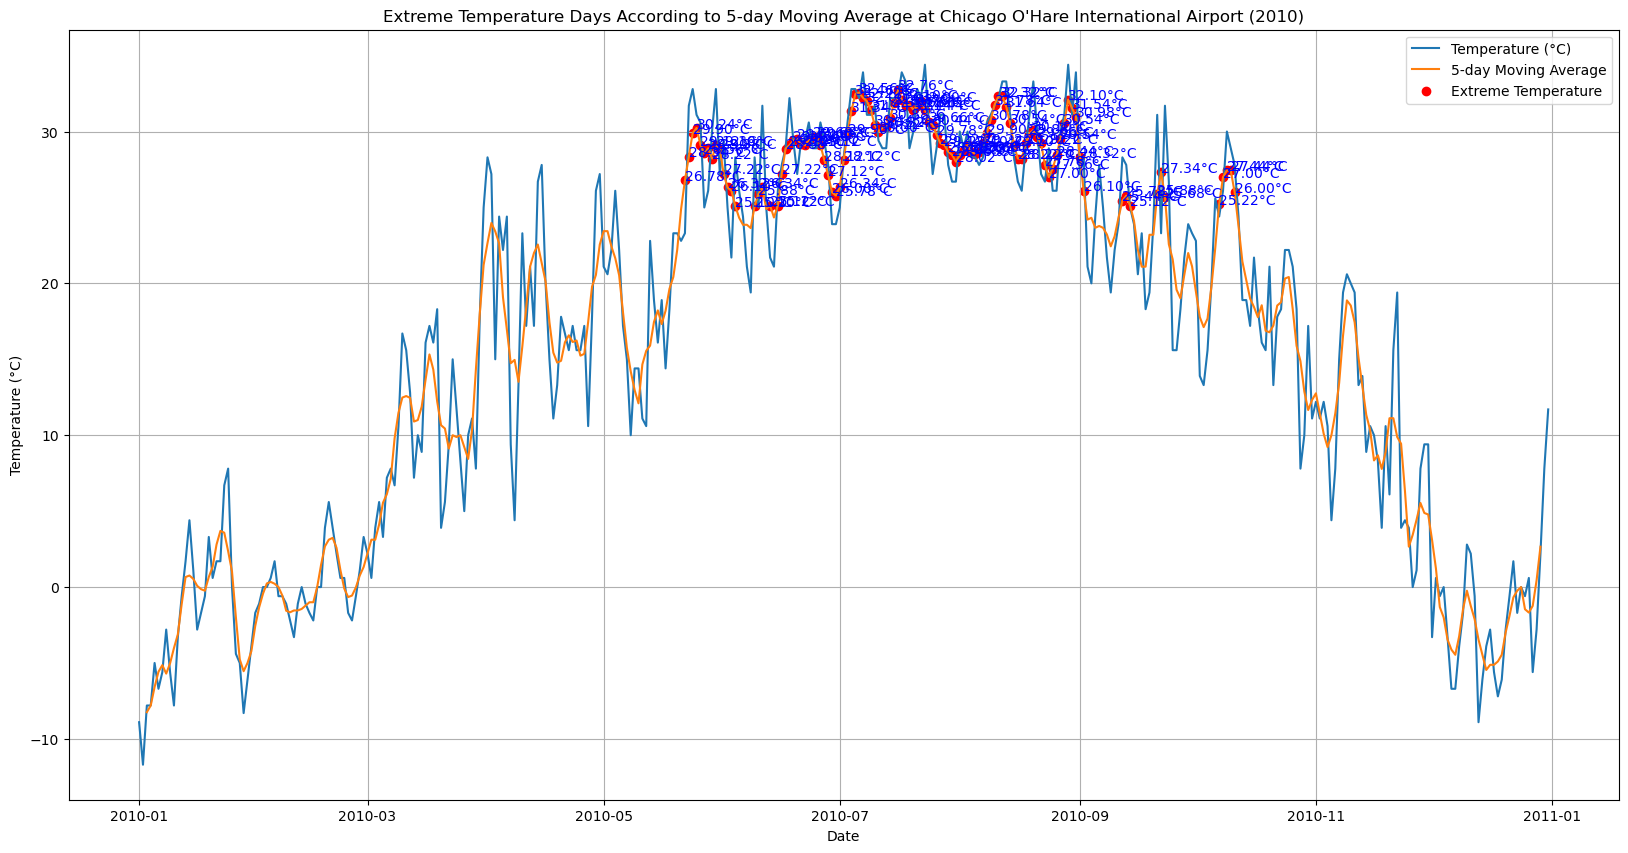

          date  moving_avg
141 2010-05-22       26.78
142 2010-05-23       28.34
143 2010-05-24       29.90
144 2010-05-25       30.24
145 2010-05-26       29.12
..         ...         ...
279 2010-10-07       25.22
280 2010-10-08       27.00
281 2010-10-09       27.44
282 2010-10-10       27.44
283 2010-10-11       26.00

[109 rows x 2 columns]


In [64]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2015
weather_data = fetch_weather_data(api_token, station_id, 2010)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 25  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["moving_avg"] >= threshold]

# Create DataFrame for extreme temperature days and their dates
extreme_temp_df = pd.DataFrame({
    "date": extreme_temp_days["date"],
    "moving_avg": extreme_temp_days["moving_avg"]
})

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(20, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(0, 0), textcoords="offset points", color="blue")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2010)")
plt.legend()
plt.savefig("temperature_plot_2010.png")  # Save the plot as a PNG file
plt.grid(True)
plt.show()

# Plot the extreme temperature days according to the 5-day moving average
plt.figure(figsize=(20, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_df["date"], extreme_temp_df["moving_avg"], color="red", label="Extreme Temperature")
for date, moving_avg in zip(extreme_temp_df["date"], extreme_temp_df["moving_avg"]):
    plt.annotate(f"{moving_avg:.2f}°C", xy=(date, moving_avg), xytext=(0, 0), textcoords="offset points", color="blue")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Extreme Temperature Days According to 5-day Moving Average at Chicago O'Hare International Airport (2010)")
plt.legend()
plt.savefig("moving_average_plot_2010.png")  # Save the plot as a PNG file
plt.grid(True)
plt.show()

# Display the extreme temperature days and their dates in the DataFrame
print(extreme_temp_df)
extreme_temp_df.to_excel("MA_2010_25C.xlsx", index=False)


# Year 2015

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2015
weather_data = fetch_weather_data(api_token, station_id, 2014)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 22  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["moving_avg"] >= threshold]

# Create DataFrame for extreme temperature days and their dates
extreme_temp_df = pd.DataFrame({
    "date": extreme_temp_days["date"],
    "moving_avg": extreme_temp_days["moving_avg"]
})

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(20, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2015)")
plt.legend()
plt.grid(True)
plt.savefig("temperature_plot_2015.png")  # Save the plot as a PNG file
plt.show()

# Plot the extreme temperature days according to the 5-day moving average
plt.figure(figsize=(20, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_df["date"], extreme_temp_df["moving_avg"], color="red", label="Extreme Temperature")
for date, moving_avg in zip(extreme_temp_df["date"], extreme_temp_df["moving_avg"]):
    plt.annotate(f"{moving_avg:.2f}°C", xy=(date, moving_avg), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Extreme Temperature Days According to 5-day Moving Average at Chicago O'Hare International Airport (2015)")
plt.legend()
plt.grid(True)
plt.savefig("moving_average_plot_2015.png")  # Save the plot as a PNG file
plt.show()

# Display the extreme temperature days and their dates in the DataFrame
print(extreme_temp_df)
extreme_temp_df.to_excel("MA_2015_30C.xlsx", index=False)


JSONDecodeError: [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>503 Service Unavailable</title>
</head><body>
<h1>Service Unavailable</h1>
<p>The server is temporarily unable to service your
request due to maintenance downtime or capacity
problems. Please try again later.</p>
<p>Additionally, a 503 Service Unavailable
error was encountered while trying to use an ErrorDocument to handle the request.</p>
</body></html>
: 0

# Year 2020

          date datatype            station attributes  value  moving_avg
0   2020-01-01     TMAX  GHCND:USW00094846   ,,W,2400    5.6         NaN
1   2020-01-02     TMAX  GHCND:USW00094846   ,,W,2400    8.9         NaN
2   2020-01-03     TMAX  GHCND:USW00094846   ,,W,2400    5.0        5.14
3   2020-01-04     TMAX  GHCND:USW00094846   ,,W,2400    0.6        5.14
4   2020-01-05     TMAX  GHCND:USW00094846   ,,W,2400    5.6        4.24
..         ...      ...                ...        ...    ...         ...
360 2020-12-26     TMAX  GHCND:USW00094846   ,,W,2400    0.6        0.26
361 2020-12-27     TMAX  GHCND:USW00094846   ,,W,2400    8.3        0.90
362 2020-12-28     TMAX  GHCND:USW00094846   ,,W,2400    1.1        2.34
363 2020-12-29     TMAX  GHCND:USW00094846   ,,W,2400    0.0         NaN
364 2020-12-30     TMAX  GHCND:USW00094846   ,,W,2400    1.7         NaN

[365 rows x 6 columns]


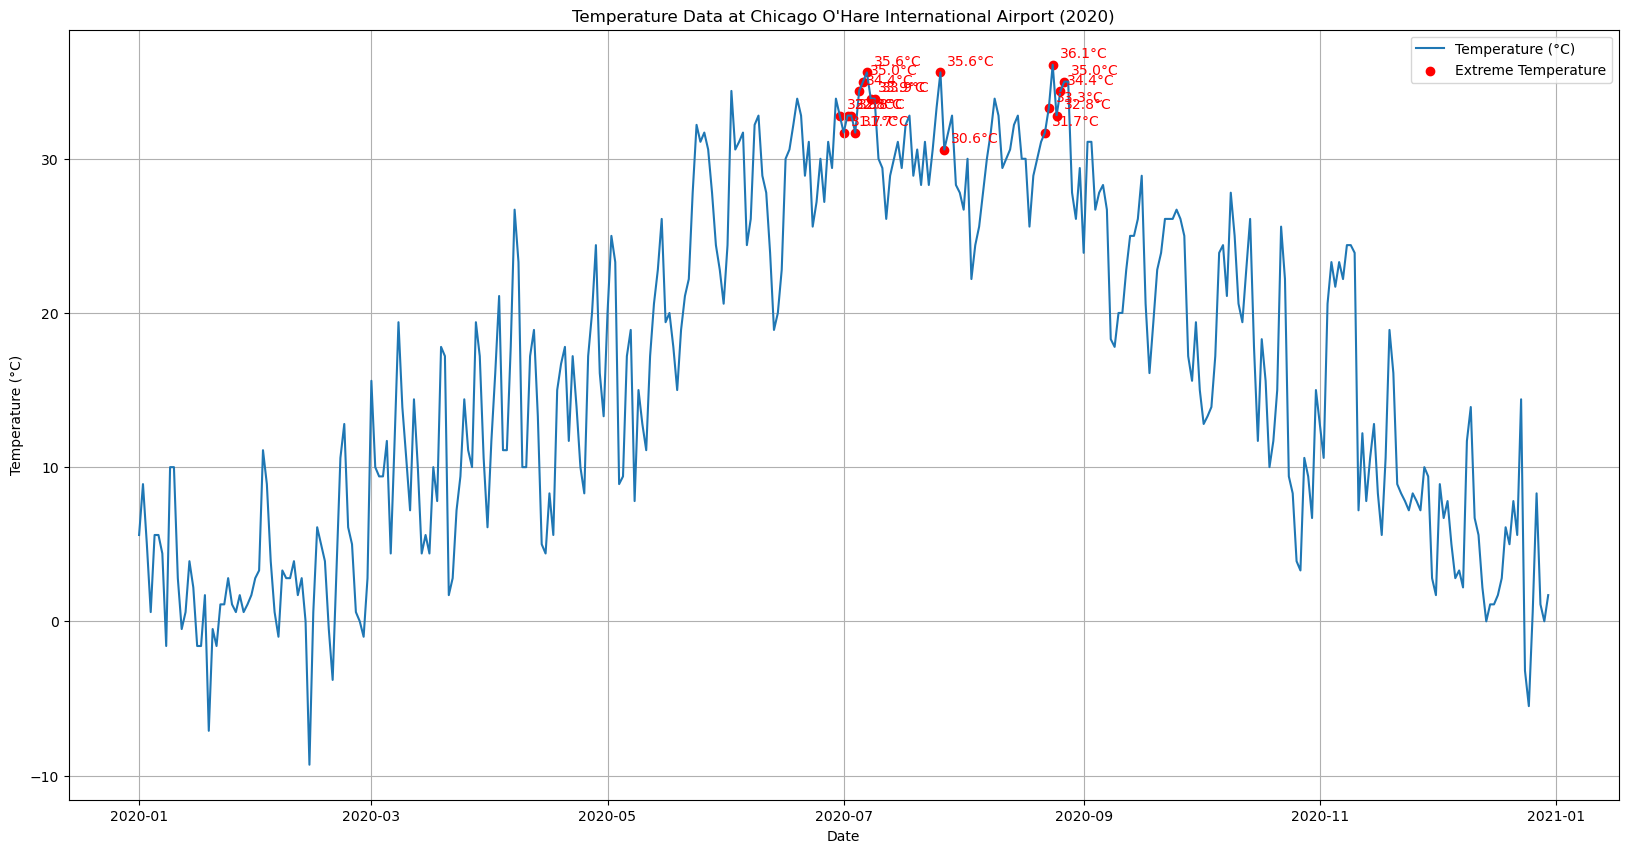

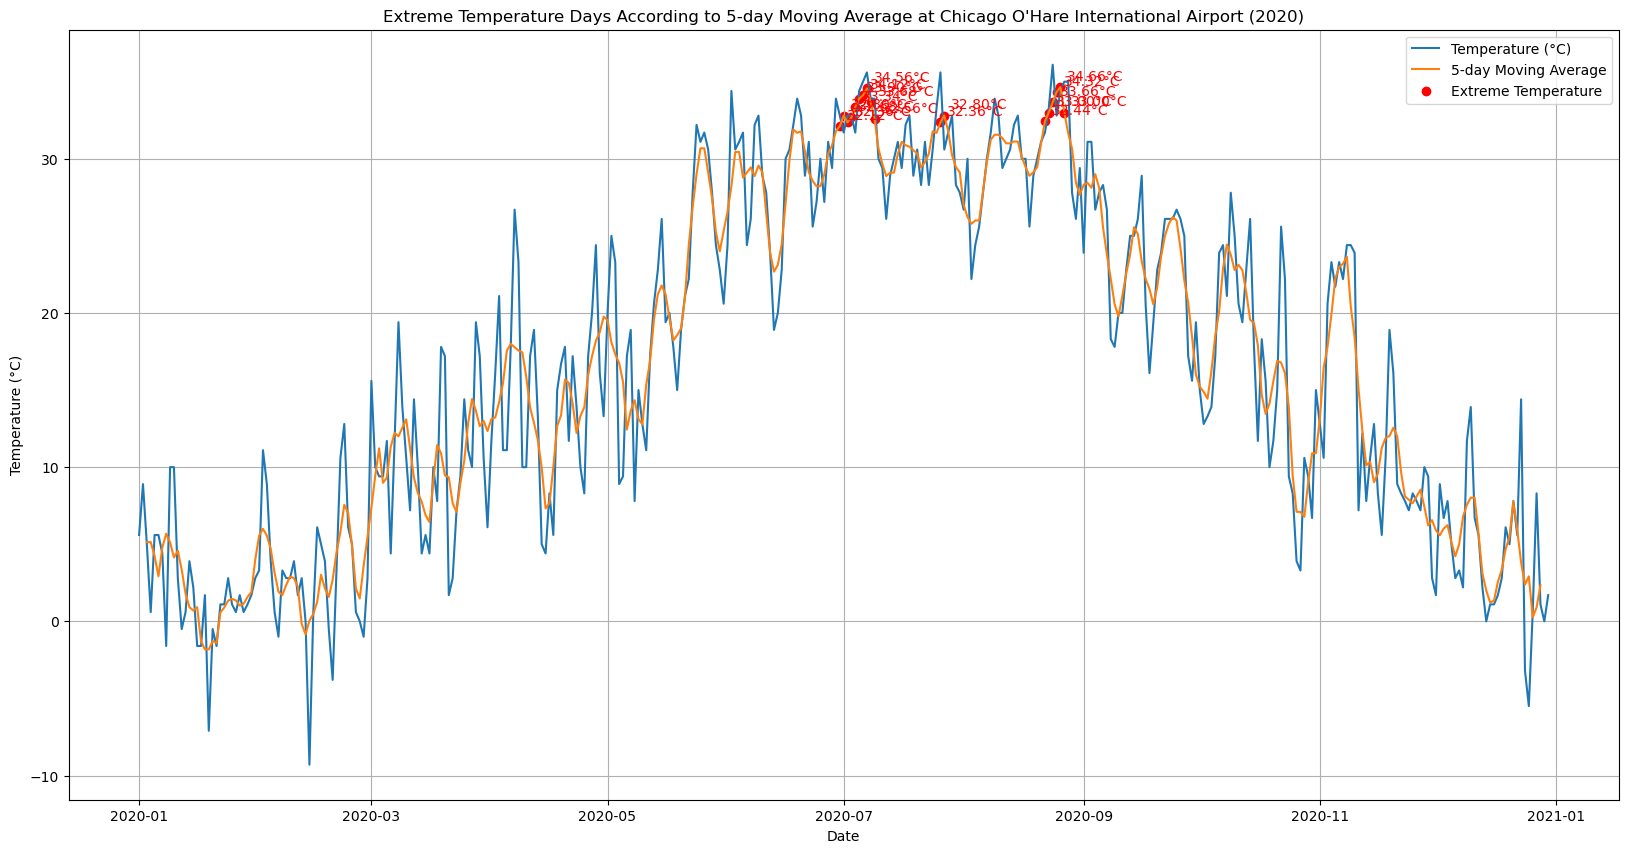

          date  moving_avg
181 2020-06-30       32.12
182 2020-07-01       32.80
183 2020-07-02       32.36
184 2020-07-03       32.68
185 2020-07-04       33.34
186 2020-07-05       33.90
187 2020-07-06       34.12
188 2020-07-07       34.56
189 2020-07-08       33.68
190 2020-07-09       32.56
207 2020-07-26       32.36
208 2020-07-27       32.80
234 2020-08-22       32.44
235 2020-08-23       33.00
236 2020-08-24       33.66
237 2020-08-25       34.32
238 2020-08-26       34.66
239 2020-08-27       33.00


In [78]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2015
weather_data = fetch_weather_data(api_token, station_id, 2020)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 32  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["moving_avg"] >= threshold]

# Create DataFrame for extreme temperature days and their dates
extreme_temp_df = pd.DataFrame({
    "date": extreme_temp_days["date"],
    "moving_avg": extreme_temp_days["moving_avg"]
})

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(20, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2020)")
plt.savefig("temperature_plot_2020.png")  # Save the plot as a PNG file
plt.legend()
plt.grid(True)
plt.show()

# Plot the extreme temperature days according to the 5-day moving average
plt.figure(figsize=(20, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_df["date"], extreme_temp_df["moving_avg"], color="red", label="Extreme Temperature")
for date, moving_avg in zip(extreme_temp_df["date"], extreme_temp_df["moving_avg"]):
    plt.annotate(f"{moving_avg:.2f}°C", xy=(date, moving_avg), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Extreme Temperature Days According to 5-day Moving Average at Chicago O'Hare International Airport (2020)")
plt.legend()
plt.grid(True)
plt.savefig("moving_average_plot_2020.png")  # Save the plot as a PNG file
plt.show()

# Display the extreme temperature days and their dates in the DataFrame
print(extreme_temp_df)
extreme_temp_df.to_excel("MA_2020_32C.xlsx", index=False)

          date datatype            station attributes  value  moving_avg
0   2020-01-01     TMAX  GHCND:USW00094846   ,,W,2400    5.6         NaN
1   2020-01-02     TMAX  GHCND:USW00094846   ,,W,2400    8.9         NaN
2   2020-01-03     TMAX  GHCND:USW00094846   ,,W,2400    5.0        5.14
3   2020-01-04     TMAX  GHCND:USW00094846   ,,W,2400    0.6        5.14
4   2020-01-05     TMAX  GHCND:USW00094846   ,,W,2400    5.6        4.24
..         ...      ...                ...        ...    ...         ...
360 2020-12-26     TMAX  GHCND:USW00094846   ,,W,2400    0.6        0.26
361 2020-12-27     TMAX  GHCND:USW00094846   ,,W,2400    8.3        0.90
362 2020-12-28     TMAX  GHCND:USW00094846   ,,W,2400    1.1        2.34
363 2020-12-29     TMAX  GHCND:USW00094846   ,,W,2400    0.0         NaN
364 2020-12-30     TMAX  GHCND:USW00094846   ,,W,2400    1.7         NaN

[365 rows x 6 columns]


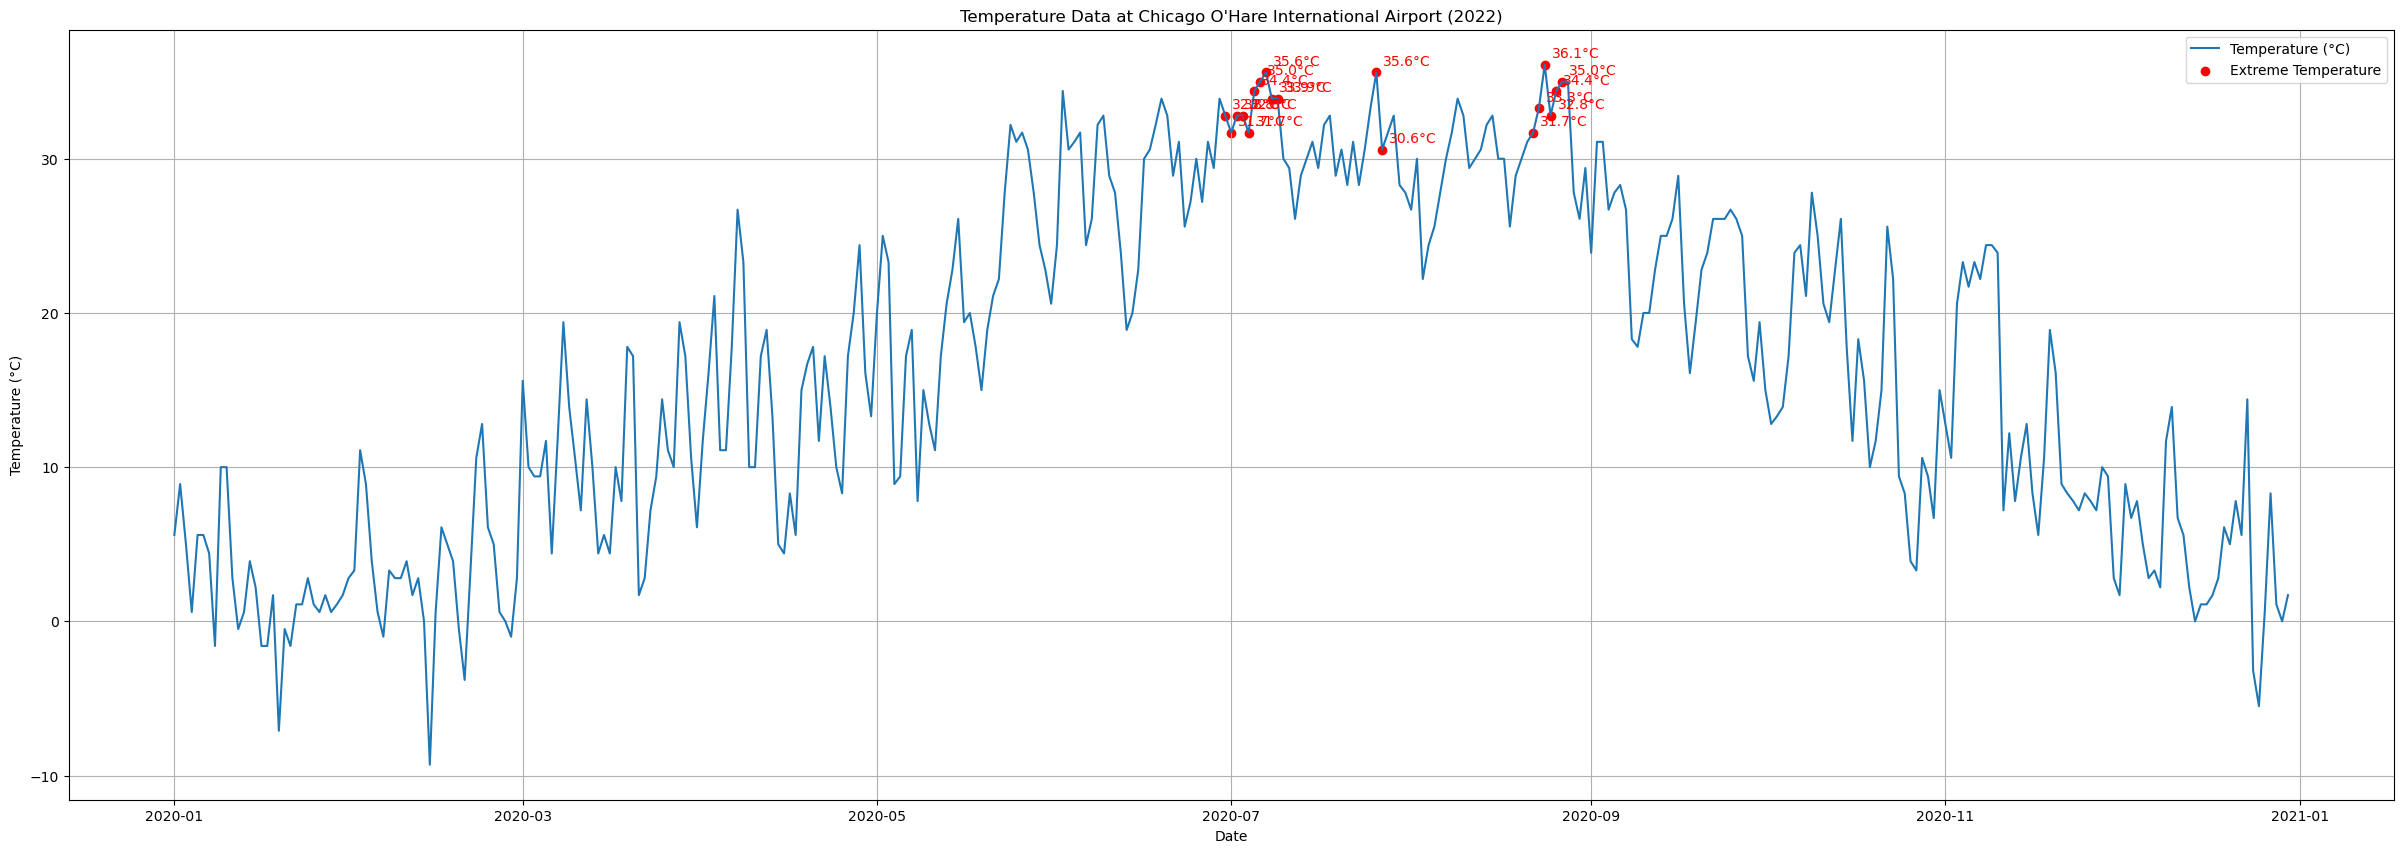

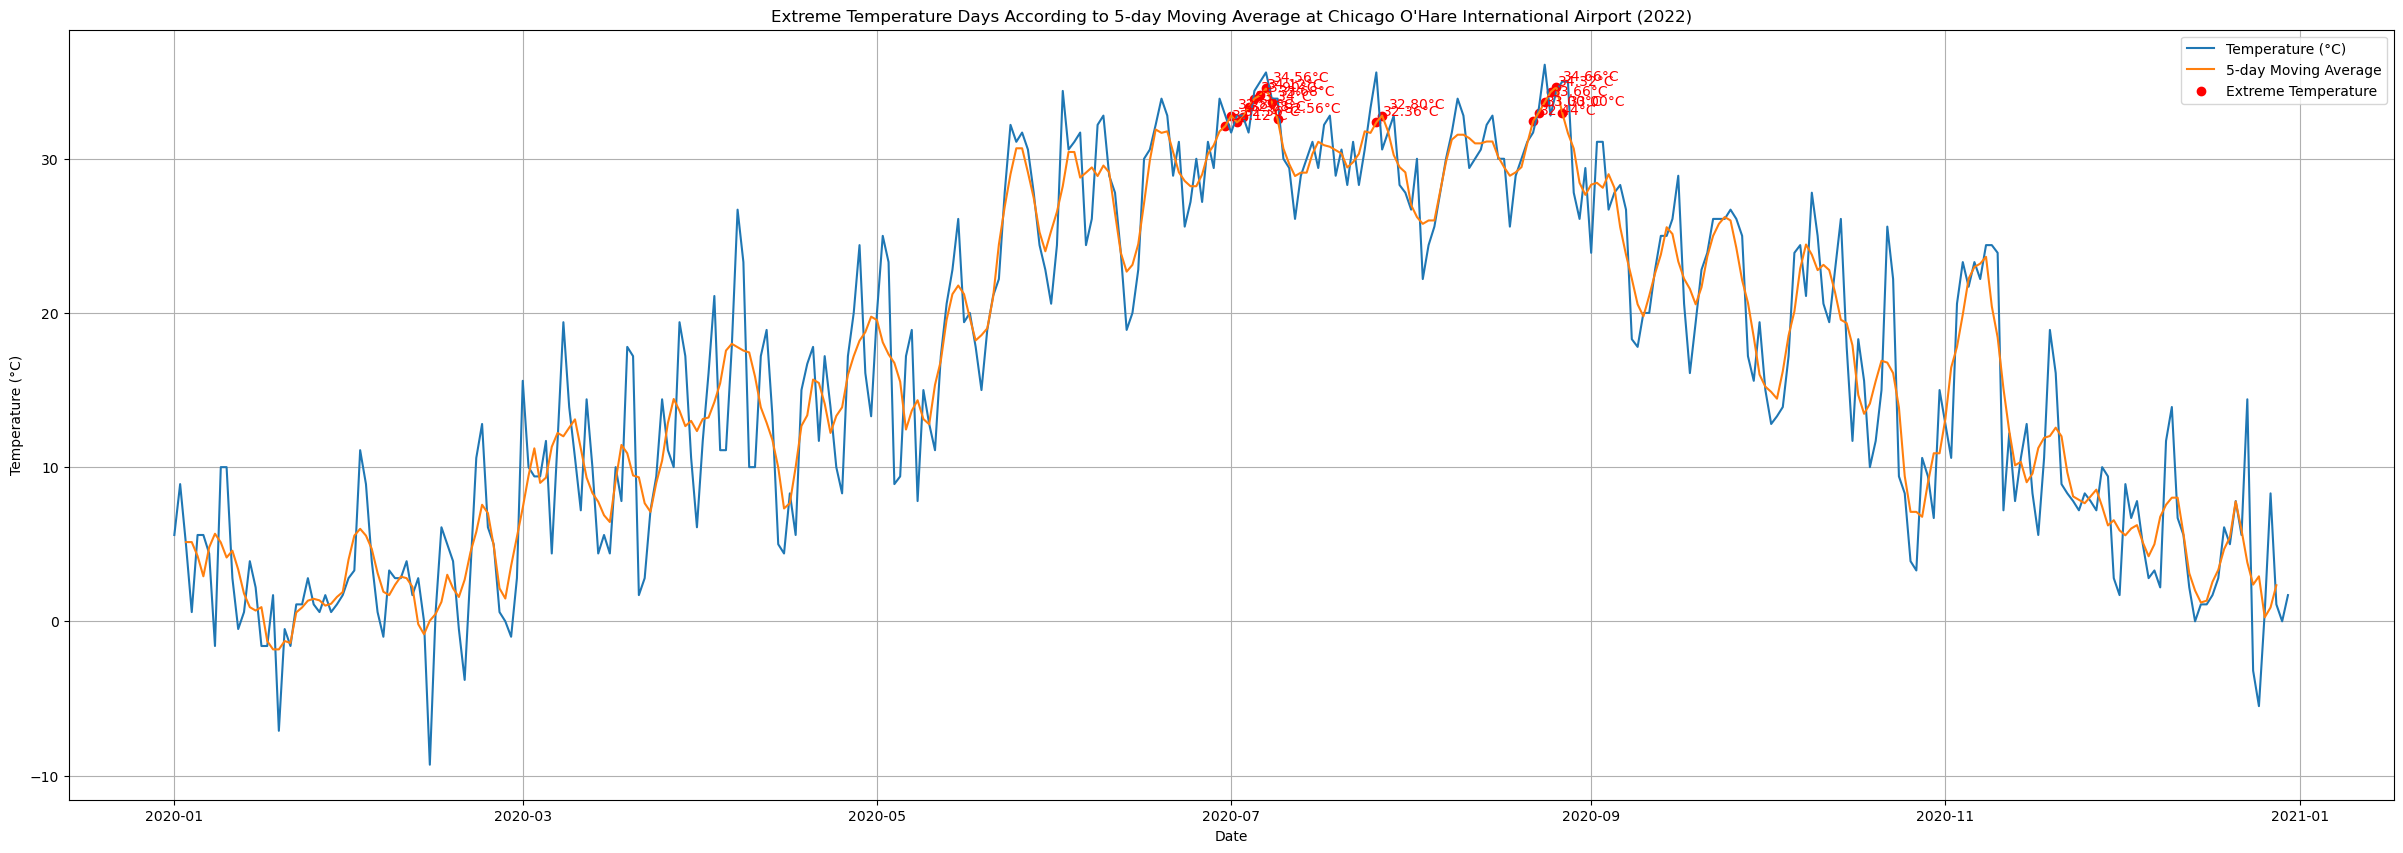

          date  moving_avg
181 2020-06-30       32.12
182 2020-07-01       32.80
183 2020-07-02       32.36
184 2020-07-03       32.68
185 2020-07-04       33.34
186 2020-07-05       33.90
187 2020-07-06       34.12
188 2020-07-07       34.56
189 2020-07-08       33.68
190 2020-07-09       32.56
207 2020-07-26       32.36
208 2020-07-27       32.80
234 2020-08-22       32.44
235 2020-08-23       33.00
236 2020-08-24       33.66
237 2020-08-25       34.32
238 2020-08-26       34.66
239 2020-08-27       33.00


In [74]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Fetch temperature data for the year 2015
weather_data = fetch_weather_data(api_token, station_id, 2020)

# Create a pandas DataFrame from the fetched data
df = pd.DataFrame(weather_data)
df["date"] = pd.to_datetime(df["date"])

# Calculate the 5-day moving average temperature
df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()

# Identify extreme temperature days
threshold = 32  # Set the threshold for extreme temperatures (adjust as needed)
extreme_temp_days = df[df["moving_avg"] >= threshold]

# Create DataFrame for extreme temperature days and their dates
extreme_temp_df = pd.DataFrame({
    "date": extreme_temp_days["date"],
    "moving_avg": extreme_temp_days["moving_avg"]
})

# Display temperature data in a table
print(df)

# Plot temperature data in a line chart
plt.figure(figsize=(30, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.scatter(extreme_temp_days["date"], extreme_temp_days["value"], color="red", label="Extreme Temperature")
for date, temp in zip(extreme_temp_days["date"], extreme_temp_days["value"]):
    plt.annotate(f"{temp}°C", xy=(date, temp), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data at Chicago O'Hare International Airport (2022)")
plt.legend()
plt.grid(True)
plt.show()

# Plot the extreme temperature days according to the 5-day moving average
plt.figure(figsize=(30, 10))
plt.plot(df["date"], df["value"], label="Temperature (°C)")
plt.plot(df["date"], df["moving_avg"], label="5-day Moving Average")
plt.scatter(extreme_temp_df["date"], extreme_temp_df["moving_avg"], color="red", label="Extreme Temperature")
for date, moving_avg in zip(extreme_temp_df["date"], extreme_temp_df["moving_avg"]):
    plt.annotate(f"{moving_avg:.2f}°C", xy=(date, moving_avg), xytext=(5, 5), textcoords="offset points", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Extreme Temperature Days According to 5-day Moving Average at Chicago O'Hare International Airport (2022)")
plt.legend()
plt.grid(True)
plt.show()

# Display the extreme temperature days and their dates in the DataFrame
print(extreme_temp_df)
extreme_temp_df.to_excel("MA_2020_32C.xlsx", index=False)

In [32]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",  # Change to the desired temperature data type
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# Chicago O'Hare International Airport weather station ID
station_id = "GHCND:USW00094846"

# Initialize empty lists to store temperature data
full_temp_data = []

# Fetch temperature data for each year from 2000 to 2022
for year in range(1970, 2023):
    weather_data = fetch_weather_data(api_token, station_id, year)
    df = pd.DataFrame(weather_data)
    df["date"] = pd.to_datetime(df["date"])
    df["moving_avg"] = df["value"].rolling(window=5, center=True).mean()
    full_temp_data.append(df)

# Concatenate data from all years into a single DataFrame
full_temp_df = pd.concat(full_temp_data, ignore_index=True)

# Display the complete temperature data
print(full_temp_df)

# Perform further analysis or visualization as needed...
# (e.g., plotting, statistical analysis, trend analysis, etc.)


            date datatype            station attributes  value  moving_avg
0     1970-01-01     TMAX  GHCND:USW00094846   ,,0,2400   -1.7         NaN
1     1970-01-02     TMAX  GHCND:USW00094846   ,,0,2400   -3.3         NaN
2     1970-01-03     TMAX  GHCND:USW00094846   ,,0,2400   -7.8       -4.78
3     1970-01-04     TMAX  GHCND:USW00094846   ,,0,2400   -3.3       -7.10
4     1970-01-05     TMAX  GHCND:USW00094846   ,,0,2400   -7.8       -9.44
...          ...      ...                ...        ...    ...         ...
19340 2022-12-27     TMAX  GHCND:USW00094846   ,,W,2400   -3.8        0.60
19341 2022-12-28     TMAX  GHCND:USW00094846   ,,W,2400    7.2        5.36
19342 2022-12-29     TMAX  GHCND:USW00094846   ,,W,2400   15.0        7.24
19343 2022-12-30     TMAX  GHCND:USW00094846   ,,W,2400   13.9         NaN
19344 2022-12-31     TMAX  GHCND:USW00094846   ,,W,2400    3.9         NaN

[19345 rows x 6 columns]


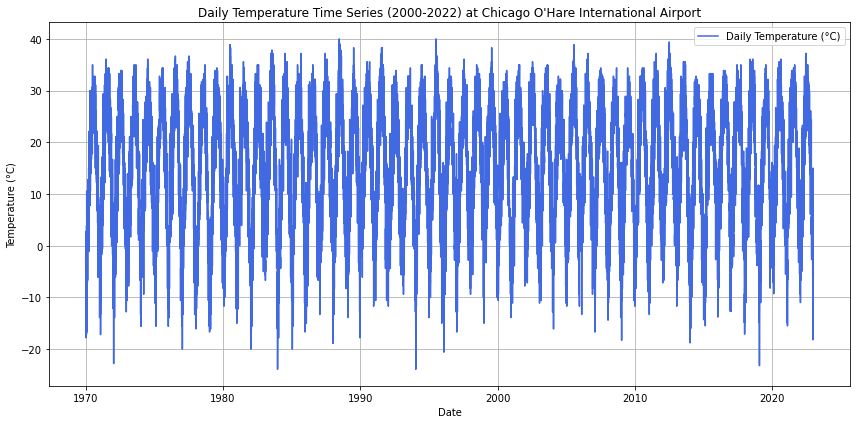

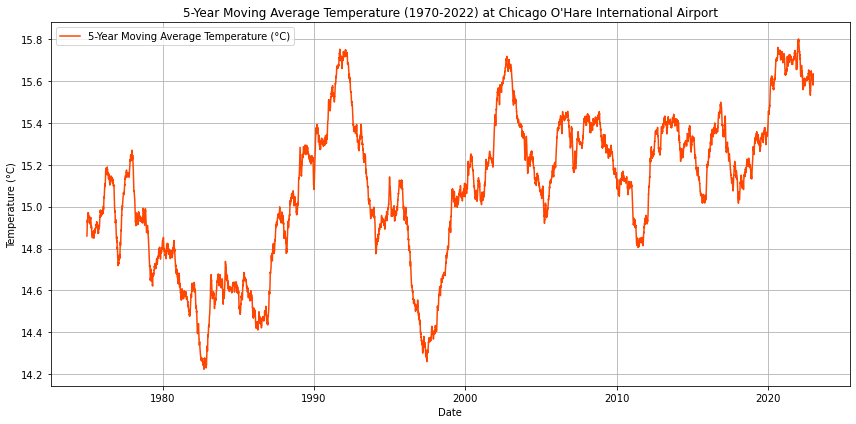

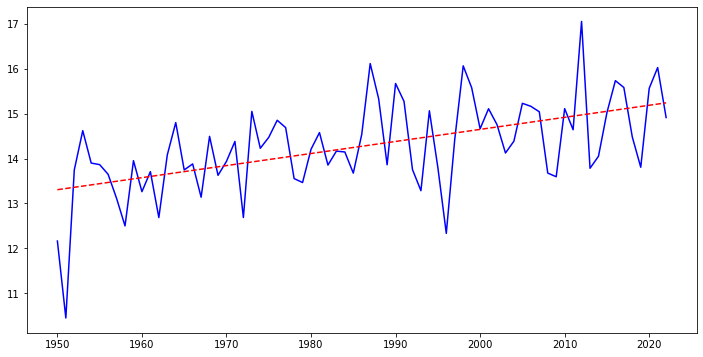

In [29]:
# Plot the time series of daily temperatures with improved readability
plt.figure(figsize=(12, 6))
plt.plot(full_temp_df["date"], full_temp_df["value"], label="Daily Temperature (°C)", color='royalblue')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature Time Series (2000-2022) at Chicago O'Hare International Airport")
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Calculate and plot the 5-year moving average temperature
moving_avg_5y = full_temp_df["value"].rolling(window=365 * 5).mean()

plt.figure(figsize=(12, 6))
plt.plot(full_temp_df["date"], moving_avg_5y, label="5-Year Moving Average Temperature (°C)", color='orangered')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("5-Year Moving Average Temperature (1970-2022) at Chicago O'Hare International Airport")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Creating a plot for mean temperature trend (2000-2022) with trendline
plt.figure(figsize=(12, 6))
plt.plot(mean_temp_trend_all.index, mean_temp_trend_all.values, label='Mean Temperature Trend (2000-2022)', color='blue')
coefficients_all = np.polyfit(range(len(mean_temp_trend_all)), mean_temp_trend_all.values, 1)
trend_all = np.poly1d(coefficients_all)
plt.plot(mean_temp_trend_all.index, trend_all(range(len(mean_temp_trend_all))), linestyle='--', color='red', label='Overall Trendline')

TypeError: expected x and y to have same length

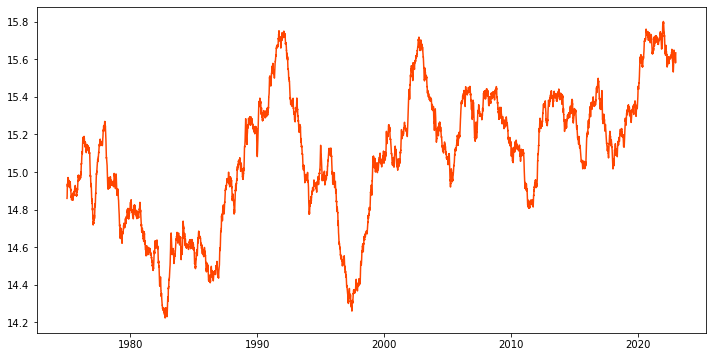

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (existing code remains the same)

# Calculate the 5-year moving average temperature
moving_avg_5y = full_temp_df["value"].rolling(window=365 * 5).mean()

# Plot the 5-year moving average temperature
plt.figure(figsize=(12, 6))
plt.plot(full_temp_df["date"], moving_avg_5y, label="5-Year Moving Average Temperature (°C)", color='orangered')

# Fit a linear regression line to the data
x = np.arange(len(moving_avg_5y))  # Create an array of x values (indices)
y = moving_avg_5y.dropna().values  # Get the y values as an array
coefficients = np.polyfit(x, y, 1)  # Fit a linear regression line
trendline = coefficients[0] * x + coefficients[1]  # Calculate the trendline

# Plot the trendline on the graph
plt.plot(full_temp_df["date"].iloc[2:-2], trendline, label=f"Trendline (Slope: {coefficients[0]:.2f} °C/year)", color='navy')

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("5-Year Moving Average Temperature (2000-2022) at Chicago O'Hare International Airport")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Creating a plot for mean temperature trend (2000-2022) with trendline
plt.figure(figsize=(12, 6))
plt.plot(mean_temp_trend_all.index, mean_temp_trend_all.values, label='Mean Temperature Trend (2000-2022)', color='blue')
coefficients_all = np.polyfit(range(len(mean_temp_trend_all)), mean_temp_trend_all.values, 1)
trend_all = np.poly1d(coefficients_all)
plt.plot(mean_temp_trend_all.index, trend_all(range(len(mean_temp_trend_all))), linestyle='--', color='red', label='Overall Trendline')

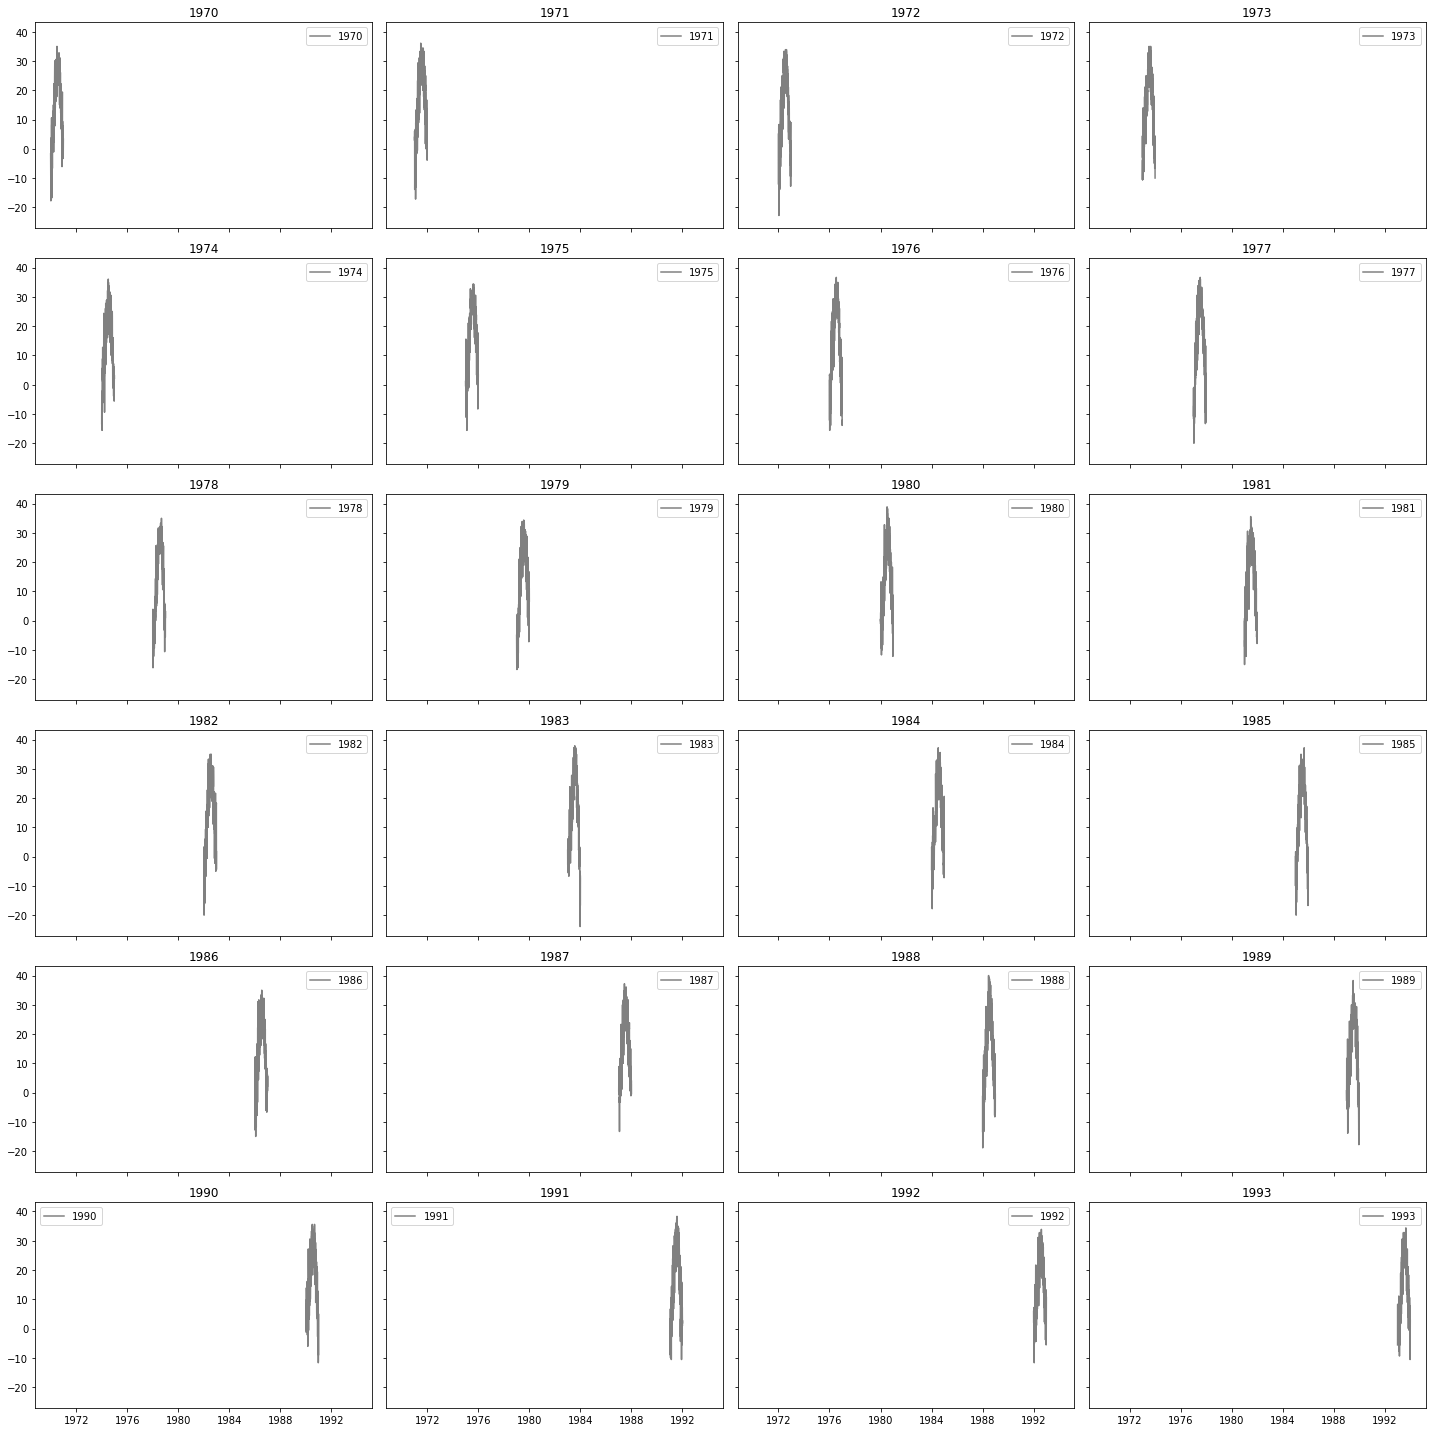

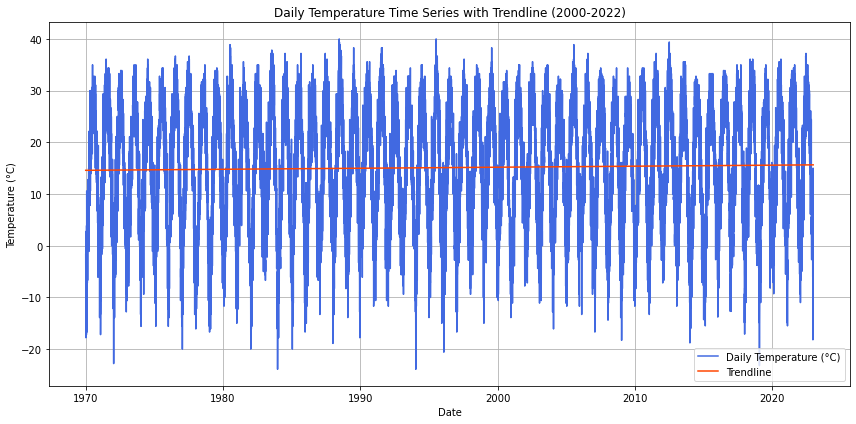

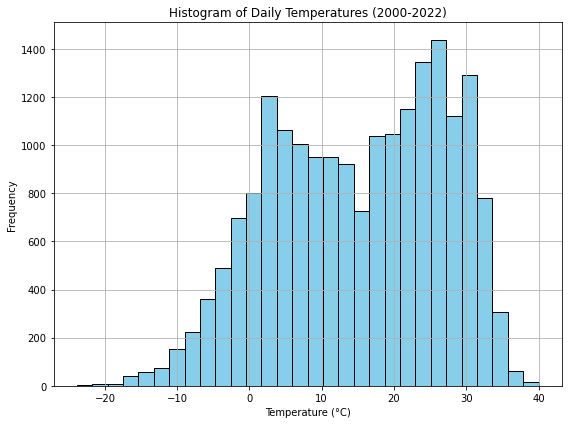

<ipython-input-28-8a9fdfa93a7f>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=full_temp_df, palette='coolwarm')


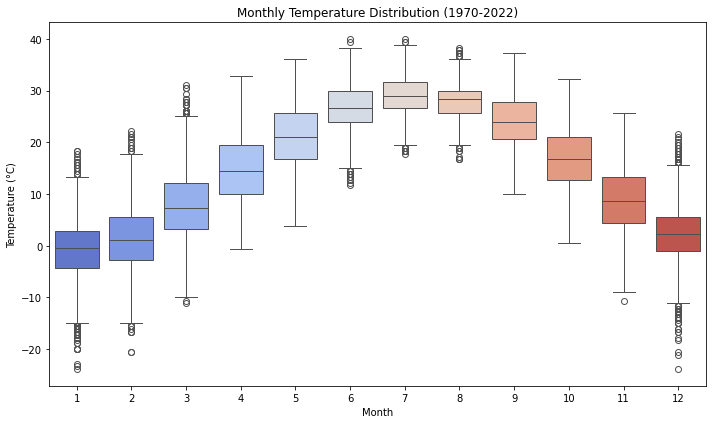

In [28]:
import numpy as np
import seaborn as sns  # Add this line to import Seaborn


# Seasonal Subplots
full_temp_df['year'] = full_temp_df['date'].dt.year

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    if i < len(full_temp_df['year'].unique()):
        year = full_temp_df['year'].unique()[i]
        temp_year = full_temp_df[full_temp_df['year'] == year]
        ax.plot(temp_year['date'], temp_year['value'], label=f'{year}', color='gray')
        ax.set_title(f'{year}')
        ax.legend()
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

# Trendline Analysis
plt.figure(figsize=(12, 6))
plt.plot(full_temp_df["date"], full_temp_df["value"], label="Daily Temperature (°C)", color='royalblue')
coefficients = np.polyfit(range(len(full_temp_df)), full_temp_df["value"], 1)
trend = np.poly1d(coefficients)
plt.plot(full_temp_df["date"], trend(range(len(full_temp_df))), label="Trendline", color='orangered')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature Time Series with Trendline (2000-2022)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram of Daily Temperatures
plt.figure(figsize=(8, 6))
plt.hist(full_temp_df["value"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Temperatures (2000-2022)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot by Month
full_temp_df['month'] = full_temp_df['date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='value', data=full_temp_df, palette='coolwarm')
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Distribution (1970-2022)")
plt.tight_layout()
plt.show()


<ipython-input-19-ffd3567a6f50>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_years_data['moving_avg'] = selected_years_data['value'].rolling(window=5, center=True).mean()


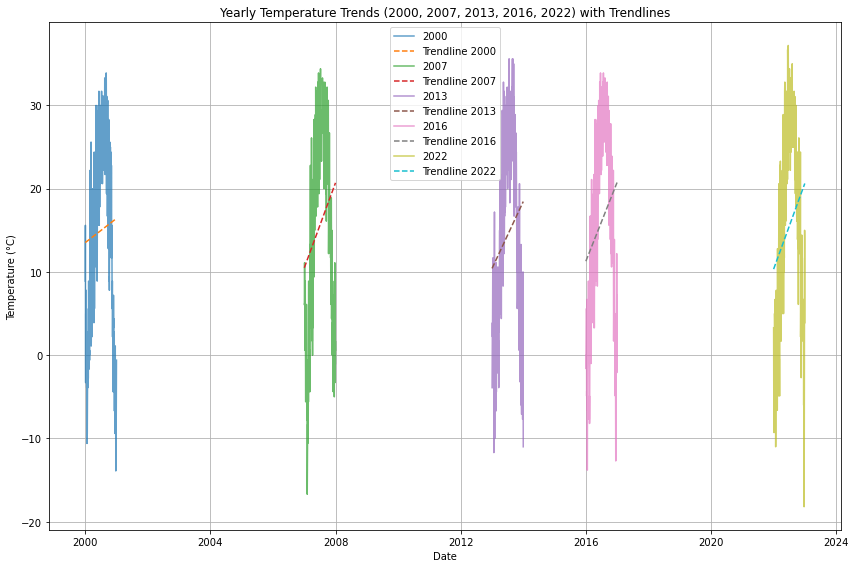

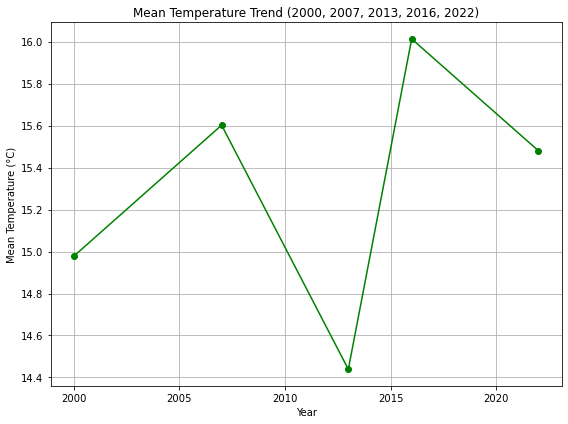

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'full_temp_df' contains the complete temperature data

# Selecting specific years
years_of_interest = [2000, 2007, 2013, 2016, 2022]
selected_years_data = full_temp_df[full_temp_df['date'].dt.year.isin(years_of_interest)]

# Grouping data by year to calculate mean temperature trend
mean_temp_trend = selected_years_data.groupby(selected_years_data['date'].dt.year)['value'].mean()

# Calculating 5-day moving average for the selected years
selected_years_data['moving_avg'] = selected_years_data['value'].rolling(window=5, center=True).mean()

# Creating separate plots for each year with trendlines
plt.figure(figsize=(12, 8))
for year in years_of_interest:
    data_year = selected_years_data[selected_years_data['date'].dt.year == year]
    coefficients = np.polyfit(range(len(data_year)), data_year['value'], 1)
    trend = np.poly1d(coefficients)
    plt.plot(data_year['date'], data_year['value'], label=f'{year}', alpha=0.7)
    plt.plot(data_year['date'], trend(range(len(data_year))), linestyle='--', label=f'Trendline {year}')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Yearly Temperature Trends (2000, 2007, 2013, 2016, 2022) with Trendlines')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting mean temperature trend
plt.figure(figsize=(8, 6))
plt.plot(mean_temp_trend.index, mean_temp_trend.values, marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Trend (2000, 2007, 2013, 2016, 2022)')
plt.grid(True)
plt.tight_layout()
plt.show()


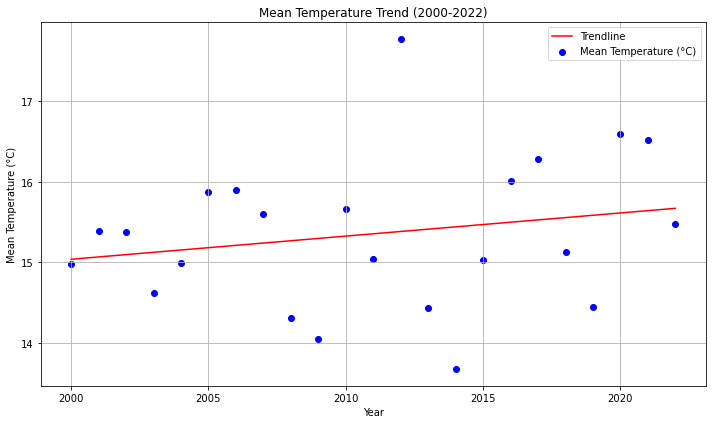

Trendline equation: y = 0.0287x + -42.38


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'full_temp_df' contains the complete temperature data

# Calculate mean temperature for each year from 2000 to 2022
mean_temp_by_year = full_temp_df.groupby(full_temp_df['date'].dt.year)['value'].mean()

# Create a trendline for the mean temperature trend
coefficients = np.polyfit(mean_temp_by_year.index, mean_temp_by_year.values, 1)
trendline = np.poly1d(coefficients)

# Plotting the mean temperature trendline
plt.figure(figsize=(10, 6))
plt.scatter(mean_temp_by_year.index, mean_temp_by_year.values, label='Mean Temperature (°C)', color='blue')
plt.plot(mean_temp_by_year.index, trendline(mean_temp_by_year.index), color='red', label='Trendline')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Trend (2000-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the equation of the trendline
print(f"Trendline equation: y = {coefficients[0]:.4f}x + {coefficients[1]:.2f}")


<ipython-input-22-b74e54571aa5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_years_data['moving_avg'] = selected_years_data['value'].rolling(window=5, center=True).mean()


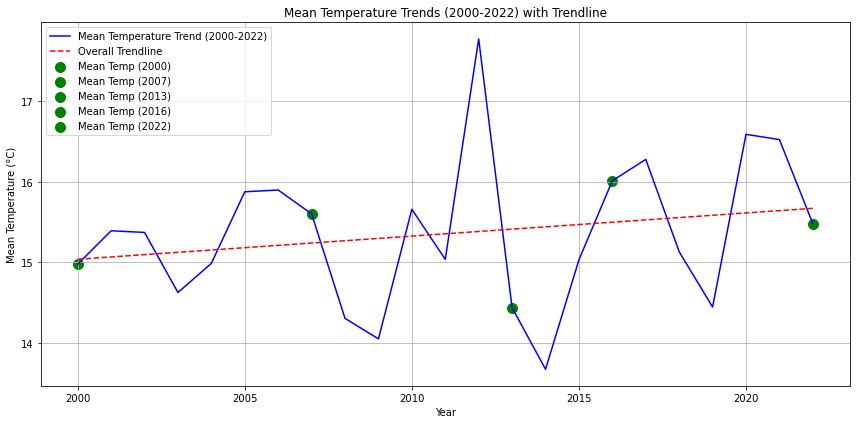

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'full_temp_df' contains the complete temperature data

# Grouping data by year to calculate mean temperature trend for 2000-2022
mean_temp_trend_all = full_temp_df.groupby(full_temp_df['date'].dt.year)['value'].mean()

# Selecting specific years
years_of_interest = [2000, 2007, 2013, 2016, 2022]
selected_years_data = full_temp_df[full_temp_df['date'].dt.year.isin(years_of_interest)]

# Grouping data by year to calculate mean temperature trend for selected years
mean_temp_trend_selected = selected_years_data.groupby(selected_years_data['date'].dt.year)['value'].mean()

# Calculating 5-day moving average for the selected years
selected_years_data['moving_avg'] = selected_years_data['value'].rolling(window=5, center=True).mean()

# Creating a plot for mean temperature trend (2000-2022) with trendline
plt.figure(figsize=(12, 6))
plt.plot(mean_temp_trend_all.index, mean_temp_trend_all.values, label='Mean Temperature Trend (2000-2022)', color='blue')
coefficients_all = np.polyfit(range(len(mean_temp_trend_all)), mean_temp_trend_all.values, 1)
trend_all = np.poly1d(coefficients_all)
plt.plot(mean_temp_trend_all.index, trend_all(range(len(mean_temp_trend_all))), linestyle='--', color='red', label='Overall Trendline')

# Plotting mean temperature trends for specific years
for year in years_of_interest:
    plt.scatter(year, mean_temp_trend_selected[year], color='green', s=100, label=f'Mean Temp ({year})')

plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Trends (2000-2022) with Trendline')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


No 'results' key found in the response for year 1970 and station GHCND:USW00014819.
No 'results' key found in the response for year 1971 and station GHCND:USW00014819.
No 'results' key found in the response for year 1972 and station GHCND:USW00014819.
No 'results' key found in the response for year 1973 and station GHCND:USW00014819.
No 'results' key found in the response for year 1974 and station GHCND:USW00014819.
No 'results' key found in the response for year 1975 and station GHCND:USW00014819.
No 'results' key found in the response for year 1976 and station GHCND:USW00014819.
No 'results' key found in the response for year 1977 and station GHCND:USW00014819.
No 'results' key found in the response for year 1978 and station GHCND:USW00014819.
Failed to fetch data for year 1979 and station GHCND:USW00014819. Status code: 503
No 'results' key found in the response for year 1980 and station GHCND:USW00014819.
No 'results' key found in the response for year 1981 and station GHCND:USW000

NameError: name 'np' is not defined

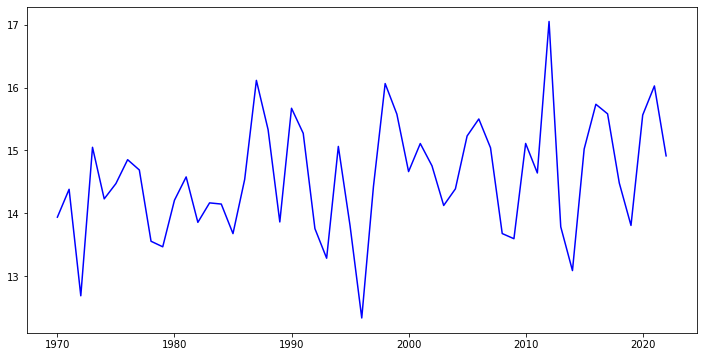

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API for a specific station and year
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    
    # Check for successful API call
    if response.status_code == 200:
        data = response.json()
        if 'results' in data:
            return data["results"]
        else:
            print(f"No 'results' key found in the response for year {year} and station {station_id}.")
    else:
        print(f"Failed to fetch data for year {year} and station {station_id}. Status code: {response.status_code}")
    return []

# List of Chicago weather station IDs
station_ids = ["GHCND:USW00014819", "GHCND:USW00014892", "GHCND:USW00014922", "GHCND:USW00094846"]  # Add more stations if needed

# Fetch temperature data for each station and year from 2000 to 2022
all_data = []
for year in range(1970, 2023):
    year_data = []
    for station_id in station_ids:
        weather_data = fetch_weather_data(api_token, station_id, year)
        if weather_data:
            df = pd.DataFrame(weather_data)
            df["date"] = pd.to_datetime(df["date"])
            year_data.append(df)
    all_data.append(pd.concat(year_data))

# Combine all data from different stations
full_temp_df = pd.concat(all_data)

# Grouping data by year to calculate mean temperature trend for 2000-2022
mean_temp_trend_all = full_temp_df.groupby(full_temp_df['date'].dt.year)['value'].mean()

# Plotting mean temperature trend for 2000-2022
plt.figure(figsize=(12, 6))
plt.plot(mean_temp_trend_all.index, mean_temp_trend_all.values, label='Mean Temperature Trend (2000-2022)', color='blue')
coefficients_all = np.polyfit(range(len(mean_temp_trend_all)), mean_temp_trend_all.values, 1)
trend_all = np.poly1d(coefficients_all)
plt.plot(mean_temp_trend_all.index, trend_all(range(len(mean_temp_trend_all))), linestyle='--', color='red', label='Overall Trendline')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Trend (2000-2022) across Chicago Weather Stations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


No 'results' key found in the response for year 1950 and station GHCND:USW00014819.
No 'results' key found in the response for year 1950 and station GHCND:USW00094846.
No 'results' key found in the response for year 1951 and station GHCND:USW00014819.
Failed to fetch data for year 1951 and station GHCND:USW00014892. Status code: 503
No 'results' key found in the response for year 1951 and station GHCND:USW00094846.
No 'results' key found in the response for year 1952 and station GHCND:USW00014819.
No 'results' key found in the response for year 1952 and station GHCND:USW00094846.
No 'results' key found in the response for year 1953 and station GHCND:USW00014819.
No 'results' key found in the response for year 1953 and station GHCND:USW00094846.
No 'results' key found in the response for year 1954 and station GHCND:USW00014819.
No 'results' key found in the response for year 1954 and station GHCND:USW00094846.
No 'results' key found in the response for year 1955 and station GHCND:USW000

NameError: name 'np' is not defined

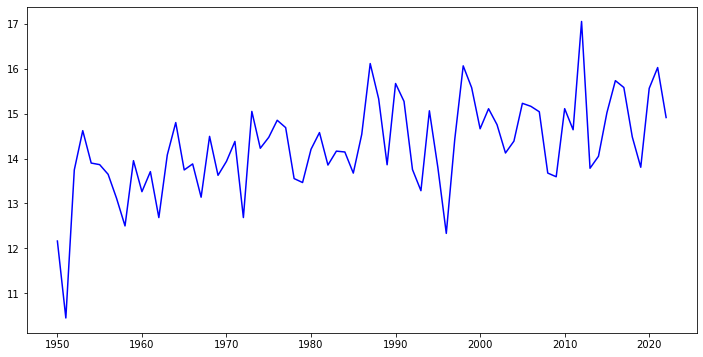

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API for a specific station and year
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    
    # Check for successful API call
    if response.status_code == 200:
        data = response.json()
        if 'results' in data:
            return data["results"]
        else:
            print(f"No 'results' key found in the response for year {year} and station {station_id}.")
    else:
        print(f"Failed to fetch data for year {year} and station {station_id}. Status code: {response.status_code}")
    return []

# List of Chicago weather station IDs
station_ids = ["GHCND:USW00014819", "GHCND:USW00014892", "GHCND:USW00014922", "GHCND:USW00094846"]  # Add more stations if needed

# Fetch temperature data for each station and year from 2000 to 2022
all_data = []
for year in range(1950, 2023):
    year_data = []
    for station_id in station_ids:
        weather_data = fetch_weather_data(api_token, station_id, year)
        if weather_data:
            df = pd.DataFrame(weather_data)
            df["date"] = pd.to_datetime(df["date"])
            year_data.append(df)
    all_data.append(pd.concat(year_data))

# Combine all data from different stations
full_temp_df = pd.concat(all_data)

# Grouping data by year to calculate mean temperature trend for 2000-2022
mean_temp_trend_all = full_temp_df.groupby(full_temp_df['date'].dt.year)['value'].mean()

# Plotting mean temperature trend for 2000-2022
plt.figure(figsize=(12, 6))
plt.plot(mean_temp_trend_all.index, mean_temp_trend_all.values, label='Mean Temperature Trend (1990-2022)', color='blue')
coefficients_all = np.polyfit(range(len(mean_temp_trend_all)), mean_temp_trend_all.values, 1)
trend_all = np.poly1d(coefficients_all)
plt.plot(mean_temp_trend_all.index, trend_all(range(len(mean_temp_trend_all))), linestyle='--', color='red', label='Overall Trendline')

# Annotate mean temperature for each year
for year, temp in zip(mean_temp_trend_all.index, mean_temp_trend_all.values):
    plt.text(year, temp, f'{temp:.2f}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Trend (2000-2022) across Chicago Weather Stations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'results'

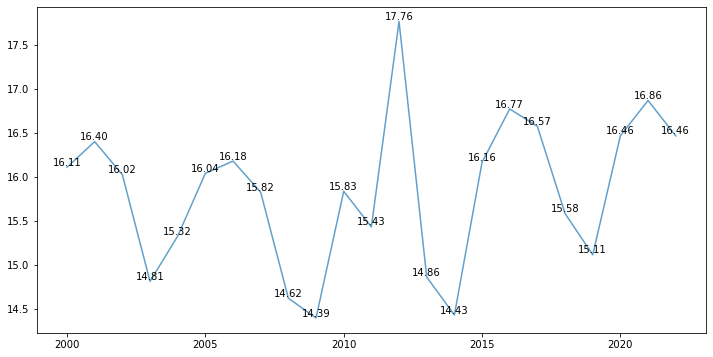

In [34]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API token for NOAA website
api_token = "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"

# Function to fetch weather data from NOAA API for a specific station and year
def fetch_weather_data(api_token, station_id, year):
    base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    headers = {"token": api_token}
    params = {
        "datasetid": "GHCND",
        "stationid": station_id,
        "startdate": f"{year}-01-01",
        "enddate": f"{year}-12-31",
        "units": "metric",
        "datatypeid": "TMAX",
        "limit": 365,  # Assuming non-leap year
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    return data["results"]

# List of Chicago weather station IDs
station_ids = ["GHCND:USW00014819", "GHCND:USW00014892", "GHCND:USW00014922", "GHCND:USW00094846"]  # Add more stations if needed

# Fetch temperature data for each station and year from 2000 to 2022
plt.figure(figsize=(12, 6))
for station_id in station_ids:
    all_data = []
    for year in range(2000, 2023):
        weather_data = fetch_weather_data(api_token, station_id, year)
        df = pd.DataFrame(weather_data)
        df["date"] = pd.to_datetime(df["date"])
        all_data.append(df)

    # Combine data for a single station
    full_temp_df = pd.concat(all_data)

    # Calculate mean temperature trend for each station
    mean_temp_trend = full_temp_df.groupby(full_temp_df['date'].dt.year)['value'].mean()

    # Plot mean temperature trend for each station
    plt.plot(mean_temp_trend.index, mean_temp_trend.values, label=f'Station {station_id[-7:]}', alpha=0.7)

    # Annotate mean temperature for each year
    for year, temp in zip(mean_temp_trend.index, mean_temp_trend.values):
        plt.text(year, temp, f'{temp:.2f}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Trend (2000-2022) for Chicago Weather Stations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
from census import Census
from us import states

# Census API key - Get your own key from Census Bureau API (https://api.census.gov/data/key_signup.html)
# Replace 'YOUR_API_KEY' with your actual API key
c = Census("762fdda76969fe3d2bc8d21f2dfe35da23791193")

# Function to fetch census tract data for a particular year
def fetch_census_data(year):
    # Chicago metro area FIPS code
    chicago_metro_fips = '16980'  # Change to the appropriate FIPS code if needed

    # Census variables for population data
    population_variables = {
        '2000': ['P001001'],
        '2010': ['P001001'],
        '2020': ['B01001_001E']
    }

    # Select the variable based on the year
    variables = population_variables.get(year)

    if not variables:
        print(f"Population data for the year {year} is not available.")
        return

    # Fetch census data for Chicago metro area
    census_data = c.acs5.state_county_tract(
        variables,
        states.IL.fips,
        chicago_metro_fips,
        Census.ALL,
        year=year
    )

    return census_data

# Fetch census tract data for the desired years
years = ['2000', '2010', '2020']
for year in years:
    print(f"Fetching census data for the year {year}...")
    data = fetch_census_data(year)
    if data:
        print(f"Census data for the year {year}:")
        print(data[:5])  # Displaying first 5 records for illustration
        print("\n")


ModuleNotFoundError: No module named 'census'

In [7]:
import requests
import json

# Function to fetch census tract data for a particular year
def fetch_census_data(year):
    # Census API base URL
    base_url = 'https://api.census.gov/data'

    # Chicago metro area FIPS code
    chicago_metro_fips = '16980'  # Change to the appropriate FIPS code if needed

    # Census variables for population data
    variables = {
        '2000': ['P001001'],
        '2010': ['P001001'],
        '2020': ['B01001_001E']
    }

    # Select the variable based on the year
    selected_variables = ','.join(variables.get(year, []))

    if not selected_variables:
        print(f"Population data for the year {year} is not available.")
        return

    # API endpoint for the specified year and variables
    endpoint = f"{base_url}/{year}/sf1"

    # Parameters for the API request
    params = {
        'get': selected_variables,
        'for': 'tract:*',
        'in': f'county:{chicago_metro_fips}',
        'key': '762fdda76969fe3d2bc8d21f2dfe35da23791193'  # Replace 'YOUR_CENSUS_API_KEY' with your actual API key
    }

    # Make the API request
    response = requests.get(endpoint, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Failed to fetch census data for the year {year}. Status code: {response.status_code}")
        return None

# Fetch census tract data for the desired years
years = ['2000', '2010', '2020']
for year in years:
    print(f"Fetching census data for the year {year}...")
    data = fetch_census_data(year)
    if data is not None:
        print(f"Census data for the year {year}:")
        print(data[:5])  # Displaying first 5 records for illustration
        print("\n")


Fetching census data for the year 2000...
Failed to fetch census data for the year 2000. Status code: 404
Fetching census data for the year 2010...
Failed to fetch census data for the year 2010. Status code: 404
Fetching census data for the year 2020...
Failed to fetch census data for the year 2020. Status code: 404


In [9]:
import requests

# Function to fetch census tract data for a particular year
def fetch_census_data(year):
    # Chicago metro area FIPS code
    chicago_metro_fips = '16980'  # Change to the appropriate FIPS code if needed

    # Census variables for population data
    variables = {
        '2000': 'P001001',
        '2010': 'P001001',
        '2020': 'B01001_001E'
    }

    # Select the variable based on the year
    selected_variable = variables.get(year)

    if not selected_variable:
        print(f"Population data for the year {year} is not available.")
        return None

    # API endpoint for the specified year and variables
    base_url = 'https://api.census.gov/data'
    endpoint = f"{base_url}/{year}/dec/sf1"

    # Parameters for the API request
    params = {
        'get': selected_variable,
        'for': 'tract:*',
        'in': f'county:{chicago_metro_fips}',
        'key': '762fdda76969fe3d2bc8d21f2dfe35da23791193'  # Replace with your actual API key
    }

    # Make the API request
    response = requests.get(endpoint, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Failed to fetch census data for the year {year}. Status code: {response.status_code}")
        return None

# Fetch census tract data for the desired years
years = ['2000', '2010', '2020']
for year in years:
    print(f"Fetching census data for the year {year}...")
    data = fetch_census_data(year)
    if data is not None:
        print(f"Census data for the year {year}:")
        print(data[:5])  # Displaying first 5 records for illustration
        print("\n")


Fetching census data for the year 2000...
Failed to fetch census data for the year 2000. Status code: 400
Fetching census data for the year 2010...
Failed to fetch census data for the year 2010. Status code: 400
Fetching census data for the year 2020...
Failed to fetch census data for the year 2020. Status code: 404
